In [145]:
### 1.

import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._create_deck()
        self.plastic_card_index = random.randint(20, len(self.cards) - 20)  # Random placement of plastic card
        self.shuffle()

    def _create_deck(self):
        """Creates a deck with the specified number of standard 52-card decks."""
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]
    
    def shuffle(self):
        """Shuffles the deck."""
        random.shuffle(self.cards)
    
    def draw_card(self):
        """Draws a card from the deck. If the plastic card is drawn, reshuffle before next deal."""
        if len(self.cards) == 0:
            self.cards = self._create_deck()
            self.shuffle()
        
        card = self.cards.pop(0)
        
        if len(self.cards) == self.plastic_card_index:
            print("Plastic card reached! Reshuffling the deck.")
            self.cards = self._create_deck()
            self.shuffle()
            self.plastic_card_index = random.randint(20, len(self.cards) - 20)  # Place a new plastic card
        
        return card
    
    def __repr__(self):
        return f"Deck with {len(self.cards)} cards remaining."

# Testing the Deck and Card classes
def test_deck():
    deck = Deck(num_decks=2)  g
    print(deck)

    for _ in range(5):
        print("Drew:", deck.draw_card())
    
    print(deck)

# Run test
test_deck()
  

Deck with 104 cards remaining.
Drew: 8 of Clubs
Drew: 2 of Diamonds
Drew: 4 of Diamonds
Drew: 6 of Spades
Drew: J of Diamonds
Deck with 99 cards remaining.


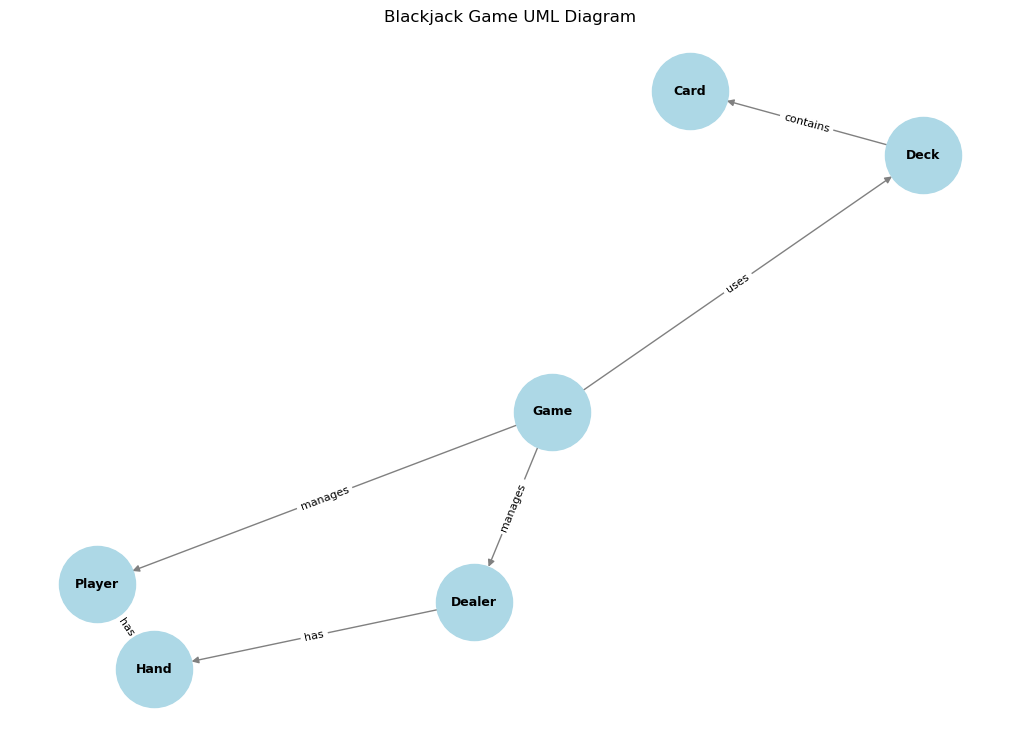

In [55]:
### 2.
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add classes as nodes
classes = {
    "Card": ["+ suit: str", "+ rank: str", "+ __str__(): str"],
    "Deck": ["+ num_decks: int", "+ cards: list[Card]", "+ plastic_card: int", "+ shuffle(): None", "+ draw_card(): Card", "+ reset_deck(): None"],
    "Hand": ["+ cards: list[Card]", "+ add_card(card: Card): None", "+ get_value(): int", "+ is_blackjack(): bool", "+ is_bust(): bool"],
    "Player": ["+ name: str", "+ chips: int", "+ hand: Hand", "+ place_bet(amount: int): None", "+ hit(deck: Deck): None", "+ stand(): None"],
    "Dealer": ["+ hand: Hand", "+ hit(deck: Deck): None", "+ play(deck: Deck): None"],
    "Game": ["+ deck: Deck", "+ players: list[Player]", "+ dealer: Dealer", "+ start(): None", "+ deal_initial_cards(): None", "+ play_round(): None", "+ determine_winner(): None"]
}

# Add nodes
for cls, attributes in classes.items():
    G.add_node(cls, label=f"{cls}\n" + "\n".join(attributes))

# Add relationships
relationships = [
    ("Deck", "Card", "contains"),
    ("Player", "Hand", "has"),
    ("Dealer", "Hand", "has"),
    ("Game", "Deck", "uses"),
    ("Game", "Player", "manages"),
    ("Game", "Dealer", "manages")
]

for rel in relationships:
    G.add_edge(rel[0], rel[1], label=rel[2])

# Draw the graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)  # Positioning

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=9, font_weight="bold")

# Draw edge labels
edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Save and display the UML diagram
plt.title("Blackjack Game UML Diagram")
plt.savefig("blackjack_uml.png", dpi=300)
plt.show()


In [150]:
### 3.

class Card:
    """Represents a single playing card."""
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        pass  # To be implemented


class Deck:
    """Represents a deck of multiple 52-card sets."""
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_index = 0

    def _create_deck(self):
        pass  # To be implemented
    
    def shuffle(self):
        pass  # To be implemented
    
    def draw_card(self):
        pass  # To be implemented


class Hand:
    """Represents a hand of cards for a player or the dealer."""
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        pass  # To be implemented

    def calculate_value(self):
        pass  # To be implemented

    def is_blackjack(self):
        pass  # To be implemented


class Player:
    """Represents a blackjack player, holding chips and making decisions."""
    def __init__(self, name, chips):
        self.name = name
        self.hand = Hand()
        self.chips = chips

    def place_bet(self, amount):
        pass  # To be implemented

    def make_decision(self):
        pass  # To be implemented


class Dealer:
    """Represents the dealer, who follows predefined game rules."""
    def __init__(self):
        self.hand = Hand()

    def play_turn(self):
        pass  # To be implemented


class Game:
    """Controls the main game loop and flow of blackjack rounds."""
    def __init__(self, num_players):
        self.players = []
        self.dealer = Dealer()
        self.deck = Deck()

    def start_game(self):
        pass  # To be implemented

    def play_round(self):
        pass  # To be implemented


In [152]:
### 4. 

import random

class Card:
    """Represents a single playing card."""
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"


class Deck:
    """Represents a deck of multiple 52-card sets."""
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._create_deck()
        self.shuffle()

    def _create_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) == 0:
            self.cards = self._create_deck()
            self.shuffle()
        return self.cards.pop(0)


class Hand:
    """Represents a hand of cards for a player or the dealer."""
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def calculate_value(self):
        value = 0
        aces = 0
        for card in self.cards:
            if card.rank in ['J', 'Q', 'K']:
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        
        while value > 21 and aces:
            value -= 10
            aces -= 1
        
        return value

    def is_blackjack(self):
        return self.calculate_value() == 21 and len(self.cards) == 2

    def __repr__(self):
        return f"Hand: {', '.join(map(str, self.cards))} (Value: {self.calculate_value()})"


class Player:
    """Represents a blackjack player, holding chips and making decisions."""
    def __init__(self, name, chips=100):
        self.name = name
        self.hand = Hand()
        self.chips = chips

    def place_bet(self, amount):
        if amount > self.chips:
            print(f"{self.name} does not have enough chips.")
            return False
        self.chips -= amount
        return True

    def make_decision(self, deck):
        while self.hand.calculate_value() < 21:
            decision = input(f"{self.name}, do you want to (h)it or (s)tand? ").strip().lower()
            if decision == 'h':
                self.hand.add_card(deck.draw_card())
                print(self.hand)
            elif decision == 's':
                break


class Dealer:
    """Represents the dealer, who follows predefined game rules."""
    def __init__(self):
        self.hand = Hand()

    def play_turn(self, deck):
        while self.hand.calculate_value() < 17:
            self.hand.add_card(deck.draw_card())
        print(f"Dealer's final hand: {self.hand}")


class Game:
    """Controls the main game loop and flow of blackjack rounds."""
    def __init__(self, num_players=1):
        self.players = [Player(f"Player {i+1}") for i in range(num_players)]
        self.dealer = Dealer()
        self.deck = Deck()

    def start_game(self):
        print("Starting Blackjack game!\n")

        # Initial dealing
        for _ in range(2):
            for player in self.players:
                player.hand.add_card(self.deck.draw_card())
            self.dealer.hand.add_card(self.deck.draw_card())

        # Show initial hands
        for player in self.players:
            print(f"{player.name}'s hand: {player.hand}")

        print(f"Dealer's visible card: {self.dealer.hand.cards[0]}")

        # Player turns
        for player in self.players:
            player.make_decision(self.deck)

        # Dealer's turn
        self.dealer.play_turn(self.deck)

        # Determine winner
        dealer_value = self.dealer.hand.calculate_value()
        for player in self.players:
            player_value = player.hand.calculate_value()
            if player_value > 21:
                print(f"{player.name} busted! Dealer wins.")
            elif dealer_value > 21 or player_value > dealer_value:
                print(f"{player.name} wins!")
            elif player_value == dealer_value:
                print(f"{player.name} pushes.")
            else:
                print(f"Dealer wins against {player.name}.")

    def play_round(self):
        self.start_game()


# Running a sample game with 1 player
game = Game(num_players=1)
game.play_round()


Starting Blackjack game!

Player 1's hand: Hand: Q of Diamonds, K of Clubs (Value: 20)
Dealer's visible card: 2 of Clubs


Player 1, do you want to (h)it or (s)tand?  h


Hand: Q of Diamonds, K of Clubs, 4 of Spades (Value: 24)
Dealer's final hand: Hand: 2 of Clubs, 9 of Diamonds, A of Hearts, 4 of Clubs, 9 of Diamonds (Value: 25)
Player 1 busted! Dealer wins.


In [154]:
### 5. 

def test_blackjack_game():
    """Simulates multiple rounds of blackjack with dealer players to verify functionality."""
    num_rounds = 5  
    num_players = 3  

    print(f"Starting Blackjack Test with {num_players} players for {num_rounds} rounds...\n")

    for round_num in range(1, num_rounds + 1):
        print(f"=== Round {round_num} ===")
        game = Game(num_players)
        game.play_round()
        print("\n" + "=" * 40 + "\n")


test_blackjack_game()


Starting Blackjack Test with 3 players for 5 rounds...

=== Round 1 ===
Starting Blackjack game!

Player 1's hand: Hand: 6 of Spades, 7 of Hearts (Value: 13)
Player 2's hand: Hand: 10 of Diamonds, A of Clubs (Value: 21)
Player 3's hand: Hand: 8 of Diamonds, 5 of Hearts (Value: 13)
Dealer's visible card: 3 of Diamonds


Player 1, do you want to (h)it or (s)tand?  h


Hand: 6 of Spades, 7 of Hearts, 9 of Spades (Value: 22)


Player 3, do you want to (h)it or (s)tand?  h


Hand: 8 of Diamonds, 5 of Hearts, Q of Hearts (Value: 23)
Dealer's final hand: Hand: 3 of Diamonds, 3 of Diamonds, 3 of Clubs, 6 of Diamonds, Q of Diamonds (Value: 25)
Player 1 busted! Dealer wins.
Player 2 wins!
Player 3 busted! Dealer wins.


=== Round 2 ===
Starting Blackjack game!

Player 1's hand: Hand: 2 of Clubs, 7 of Spades (Value: 9)
Player 2's hand: Hand: 9 of Diamonds, Q of Clubs (Value: 19)
Player 3's hand: Hand: 9 of Clubs, A of Diamonds (Value: 20)
Dealer's visible card: 6 of Diamonds


Player 1, do you want to (h)it or (s)tand?  h


Hand: 2 of Clubs, 7 of Spades, A of Spades (Value: 20)


Player 1, do you want to (h)it or (s)tand?  h


Hand: 2 of Clubs, 7 of Spades, A of Spades, 5 of Spades (Value: 15)


Player 1, do you want to (h)it or (s)tand?  h


Hand: 2 of Clubs, 7 of Spades, A of Spades, 5 of Spades, J of Spades (Value: 25)


Player 2, do you want to (h)it or (s)tand?  s
Player 3, do you want to (h)it or (s)tand?  s


Dealer's final hand: Hand: 6 of Diamonds, K of Hearts, 7 of Hearts (Value: 23)
Player 1 busted! Dealer wins.
Player 2 wins!
Player 3 wins!


=== Round 3 ===
Starting Blackjack game!

Player 1's hand: Hand: 7 of Clubs, 10 of Hearts (Value: 17)
Player 2's hand: Hand: 2 of Diamonds, 5 of Spades (Value: 7)
Player 3's hand: Hand: A of Spades, 6 of Clubs (Value: 17)
Dealer's visible card: Q of Spades


Player 1, do you want to (h)it or (s)tand?  s
Player 2, do you want to (h)it or (s)tand?  s
Player 3, do you want to (h)it or (s)tand?  s


Dealer's final hand: Hand: Q of Spades, 7 of Clubs (Value: 17)
Player 1 pushes.
Dealer wins against Player 2.
Player 3 pushes.


=== Round 4 ===
Starting Blackjack game!

Player 1's hand: Hand: 6 of Diamonds, 5 of Clubs (Value: 11)
Player 2's hand: Hand: 7 of Hearts, 5 of Spades (Value: 12)
Player 3's hand: Hand: 7 of Clubs, 4 of Hearts (Value: 11)
Dealer's visible card: 10 of Diamonds


Player 1, do you want to (h)it or (s)tand?  s
Player 2, do you want to (h)it or (s)tand?  s
Player 3, do you want to (h)it or (s)tand?  s


Dealer's final hand: Hand: 10 of Diamonds, 10 of Spades (Value: 20)
Dealer wins against Player 1.
Dealer wins against Player 2.
Dealer wins against Player 3.


=== Round 5 ===
Starting Blackjack game!

Player 1's hand: Hand: 10 of Clubs, 9 of Hearts (Value: 19)
Player 2's hand: Hand: 2 of Spades, 3 of Hearts (Value: 5)
Player 3's hand: Hand: 6 of Hearts, J of Spades (Value: 16)
Dealer's visible card: Q of Diamonds


Player 1, do you want to (h)it or (s)tand?  s
Player 2, do you want to (h)it or (s)tand?  s
Player 3, do you want to (h)it or (s)tand?  s


Dealer's final hand: Hand: Q of Diamonds, 5 of Spades, K of Clubs (Value: 25)
Player 1 wins!
Player 2 wins!
Player 3 wins!




In [158]:
### 6.

class CardCountingPlayer(Player):
    """Player using a card counting strategy to decide when to hit or stay."""
    
    def __init__(self, name, chips=100, hit_threshold=-2):
        super().__init__(name, chips)
        self.running_count = 0  
        self.hit_threshold = hit_threshold

    def update_count(self, card):
        """Update count based on card values."""
        if card.rank in ['2', '3', '4', '5', '6']:
            self.running_count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count -= 1
        

    def make_decision(self, deck):
        """Decide to hit or stay based on the running count."""
        while self.hand.calculate_value() < 21:
            print(f"{self.name} running count: {self.running_count}")
            if self.running_count <= self.hit_threshold:
                print(f"{self.name} hits!")
                card = deck.draw_card()
                self.hand.add_card(card)
                self.update_count(card)
                print(self.hand)
            else:
                print(f"{self.name} stays.")
                break


In [160]:
def test_card_counting_player():
    """Simulates a game with a card-counting player to test their strategy."""
    num_rounds = 5  
    num_players = 2  

    print(f"Starting Blackjack Test with {num_players} players for {num_rounds} rounds...\n")

    for round_num in range(1, num_rounds + 1):
        print(f"=== Round {round_num} ===")
        game = Game(num_players=1)  
        counting_player = CardCountingPlayer(name="Counter", chips=100, hit_threshold=-2)
        game.players.append(counting_player)  
        game.play_round()
        print("\n" + "=" * 40 + "\n")


test_card_counting_player()


Starting Blackjack Test with 2 players for 5 rounds...

=== Round 1 ===
Starting Blackjack game!

Player 1's hand: Hand: 9 of Spades, 5 of Hearts (Value: 14)
Counter's hand: Hand: 10 of Hearts, 5 of Spades (Value: 15)
Dealer's visible card: 6 of Clubs


Player 1, do you want to (h)it or (s)tand?  s


Counter running count: 0
Counter stays.
Dealer's final hand: Hand: 6 of Clubs, 4 of Diamonds, Q of Clubs (Value: 20)
Dealer wins against Player 1.
Dealer wins against Counter.


=== Round 2 ===
Starting Blackjack game!

Player 1's hand: Hand: 6 of Hearts, 6 of Diamonds (Value: 12)
Counter's hand: Hand: 2 of Spades, A of Diamonds (Value: 13)
Dealer's visible card: 6 of Spades


Player 1, do you want to (h)it or (s)tand?  s


Counter running count: 0
Counter stays.
Dealer's final hand: Hand: 6 of Spades, 2 of Hearts, 4 of Spades, 9 of Hearts (Value: 21)
Dealer wins against Player 1.
Dealer wins against Counter.


=== Round 3 ===
Starting Blackjack game!

Player 1's hand: Hand: A of Hearts, K of Hearts (Value: 21)
Counter's hand: Hand: 4 of Hearts, 2 of Hearts (Value: 6)
Dealer's visible card: J of Spades
Counter running count: 0
Counter stays.
Dealer's final hand: Hand: J of Spades, 9 of Hearts (Value: 19)
Player 1 wins!
Dealer wins against Counter.


=== Round 4 ===
Starting Blackjack game!

Player 1's hand: Hand: 2 of Hearts, 3 of Clubs (Value: 5)
Counter's hand: Hand: 9 of Hearts, 10 of Spades (Value: 19)
Dealer's visible card: 9 of Clubs


Player 1, do you want to (h)it or (s)tand?  s


Counter running count: 0
Counter stays.
Dealer's final hand: Hand: 9 of Clubs, 9 of Diamonds (Value: 18)
Dealer wins against Player 1.
Counter wins!


=== Round 5 ===
Starting Blackjack game!

Player 1's hand: Hand: K of Hearts, 5 of Diamonds (Value: 15)
Counter's hand: Hand: 4 of Spades, 9 of Diamonds (Value: 13)
Dealer's visible card: 6 of Spades


Player 1, do you want to (h)it or (s)tand?  s


Counter running count: 0
Counter stays.
Dealer's final hand: Hand: 6 of Spades, 3 of Hearts, Q of Clubs (Value: 19)
Dealer wins against Player 1.
Dealer wins against Counter.




In [162]:
### 7. 

class DealerPlayer(Player):
    """A player that follows the dealer's strategy (hits on 16 or less, stands on 17+)."""
    
    def make_decision(self, deck):
        """Automatically plays like a dealer."""
        while self.hand.calculate_value() < 17:
            self.hand.add_card(deck.draw_card())


def simulate_blackjack_with_strategy():
    """Runs a 50-round simulation with a card counting player and 3 dealer-style players."""
    num_rounds = 50
    starting_chips = 100
    players = [
        CardCountingPlayer("Counter", chips=starting_chips, hit_threshold=-2),  
        DealerPlayer("Dealer-Style Player 1", chips=starting_chips),
        DealerPlayer("Dealer-Style Player 2", chips=starting_chips),
        DealerPlayer("Dealer-Style Player 3", chips=starting_chips)
    ]
    
    dealer = Dealer()
    deck = Deck()
    verbose = False  

    for round_num in range(1, num_rounds + 1):
        if players[0].chips <= 0:
            print(f"Strategy Player is out of money after {round_num-1} rounds.")
            break

        if verbose:
            print(f"\n=== Round {round_num} ===")

        # Reset hands
        for player in players:
            player.hand = Hand()
        dealer.hand = Hand()

        # Place bets (fixed bet per round)
        bet_amount = 10
        for player in players:
            player.place_bet(bet_amount)

        # Initial dealing
        for _ in range(2):
            for player in players:
                card = deck.draw_card()
                player.hand.add_card(card)
                if isinstance(player, CardCountingPlayer):
                    player.update_count(card)
            dealer.hand.add_card(deck.draw_card())

        # Players' turns
        for player in players:
            player.make_decision(deck)

        # Dealer's turn
        dealer.play_turn(deck)

        # Determine winner
        dealer_value = dealer.hand.calculate_value()
        for player in players:
            player_value = player.hand.calculate_value()

            if player_value > 21:
                if verbose:
                    print(f"{player.name} busted. Dealer wins.")
            elif dealer_value > 21 or player_value > dealer_value:
                player.chips += bet_amount * 2  
                if verbose:
                    print(f"{player.name} wins!")
            elif player_value == dealer_value:
                player.chips += bet_amount  
                if verbose:
                    print(f"{player.name} pushes.")
            else:
                if verbose:
                    print(f"Dealer wins against {player.name}.")


    print("\n=== FINAL RESULTS ===")
    for player in players:
        print(f"{player.name}: {player.chips} chips (Starting: {starting_chips})")


simulate_blackjack_with_strategy()


Counter running count: 0
Counter stays.
Dealer's final hand: Hand: 6 of Diamonds, 5 of Spades, 5 of Diamonds, 7 of Clubs (Value: 23)
Counter running count: 1
Counter stays.
Dealer's final hand: Hand: 9 of Spades, 9 of Diamonds (Value: 18)
Counter running count: 3
Counter stays.
Dealer's final hand: Hand: 9 of Hearts, 3 of Hearts, 3 of Hearts, J of Spades (Value: 25)
Counter running count: 4
Counter stays.
Dealer's final hand: Hand: 4 of Clubs, 4 of Clubs, 6 of Diamonds, 5 of Clubs (Value: 19)
Counter running count: 3
Counter stays.
Dealer's final hand: Hand: 6 of Spades, Q of Clubs, A of Hearts (Value: 17)
Counter running count: 2
Counter stays.
Dealer's final hand: Hand: 10 of Spades, 3 of Clubs, 7 of Clubs (Value: 20)
Counter running count: 1
Counter stays.
Dealer's final hand: Hand: 6 of Hearts, K of Spades, A of Clubs (Value: 17)
Counter running count: 0
Counter stays.
Dealer's final hand: Hand: 2 of Clubs, A of Diamonds, J of Spades, A of Spades, 7 of Hearts (Value: 21)
Counter ru

Counter running count: 0
Counter stays.
Dealer's final hand: Hand: 9 of Spades, 10 of Spades (Value: 19)
Counter running count: 1
Counter stays.
Dealer's final hand: Hand: 8 of Clubs, J of Diamonds (Value: 18)
Counter running count: 0
Counter stays.
Dealer's final hand: Hand: K of Diamonds, K of Clubs (Value: 20)
Counter running count: 2
Counter stays.
Dealer's final hand: Hand: 3 of Diamonds, 9 of Hearts, 10 of Spades (Value: 22)
Counter running count: 3
Counter stays.
Dealer's final hand: Hand: A of Diamonds, A of Diamonds, 2 of Spades, J of Spades, 9 of Spades (Value: 23)
Counter running count: 5
Counter stays.
Dealer's final hand: Hand: A of Clubs, Q of Hearts (Value: 21)
Counter running count: 7
Counter stays.
Dealer's final hand: Hand: 3 of Diamonds, J of Spades, 8 of Diamonds (Value: 21)
Counter running count: 7
Counter stays.
Dealer's final hand: Hand: 2 of Hearts, Q of Spades, Q of Spades (Value: 22)
Counter running count: 7
Counter stays.
Dealer's final hand: Hand: 10 of Club

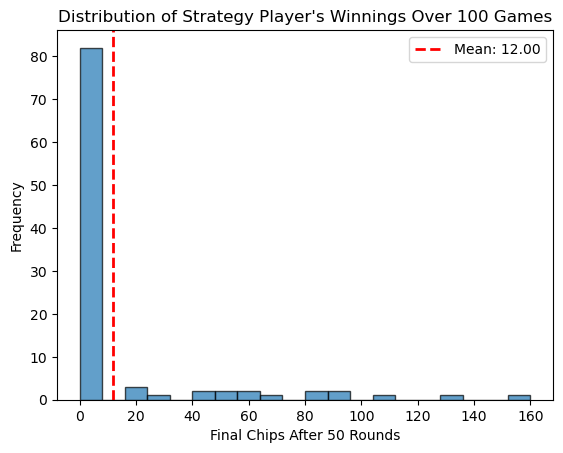

In [166]:
### 8.

def simulate_multiple_games(num_games=100, num_rounds=50, starting_chips=100, bet_amount=10):
    """Simulates multiple blackjack games and stores the strategy player's winnings."""
    winnings = []

    for game in range(num_games):
        strategy_player = CardCountingPlayer("Counter", chips=starting_chips, hit_threshold=-2)
        other_players = [
            DealerPlayer("Dealer-Style Player 1", chips=starting_chips),
            DealerPlayer("Dealer-Style Player 2", chips=starting_chips),
            DealerPlayer("Dealer-Style Player 3", chips=starting_chips)
        ]
        dealer = Dealer()
        deck = Deck()

        for round_num in range(num_rounds):
            if strategy_player.chips <= 0:
                break 

            # Reset hands
            for player in [strategy_player] + other_players:
                player.hand = Hand()
            dealer.hand = Hand()

            # Players place bets
            for player in [strategy_player] + other_players:
                player.place_bet(bet_amount)

            # Initial dealing
            for _ in range(2):
                for player in [strategy_player] + other_players:
                    card = deck.draw_card()
                    player.hand.add_card(card)
                    if isinstance(player, CardCountingPlayer):
                        player.update_count(card)
                dealer.hand.add_card(deck.draw_card())

            # Players' turns
            strategy_player.make_decision(deck)
            for player in other_players:
                player.make_decision(deck)

            # Dealer's turn
            dealer.play_turn(deck)

            # Determine results
            dealer_value = dealer.hand.calculate_value()
            for player in [strategy_player] + other_players:
                player_value = player.hand.calculate_value()

                if player_value > 21:  # Player busts
                    pass  # Already lost bet
                elif dealer_value > 21 or player_value > dealer_value:
                    player.chips += bet_amount * 2  
                elif player_value == dealer_value:
                    player.chips += bet_amount  

        # Store final chips of the strategy player
        winnings.append(strategy_player.chips)

    return np.array(winnings)

# Run 100 simulations of 50-round games with the strategy player
winnings = simulate_multiple_games(num_games=100)

# Compute statistics
average_winnings = np.mean(winnings)
std_dev = np.std(winnings)
probability_winning = np.sum(winnings > 100) / len(winnings)  
probability_losing = np.sum(winnings < 100) / len(winnings)  


results_df = pd.DataFrame({
    "Metric": ["Average Winnings", "Standard Deviation", "Probability of Winning", "Probability of Losing"],
    "Value": [average_winnings, std_dev, probability_winning, probability_losing]
})



In [168]:
results_df

Metric      Value
0        Average Winnings  12.000000
1      Standard Deviation  30.265492
2  Probability of Winning   0.030000
3   Probability of Losing   0.970000

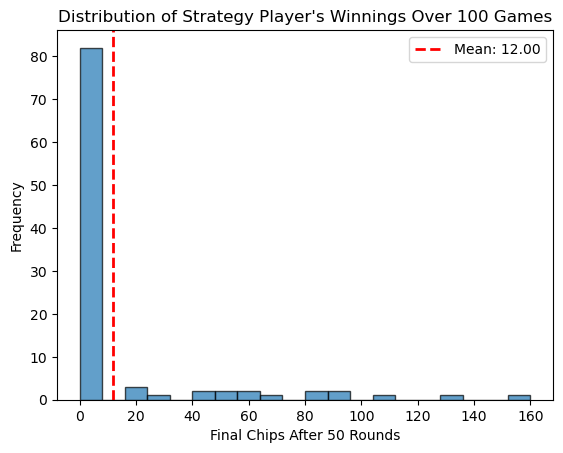

In [170]:
# Plot histogram
plt.hist(winnings, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(average_winnings, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {average_winnings:.2f}")
plt.xlabel("Final Chips After 50 Rounds")
plt.ylabel("Frequency")
plt.title("Distribution of Strategy Player's Winnings Over 100 Games")
plt.legend()
plt.show()

In [172]:
### 9.

def scan_threshold_values(threshold_values, num_games=100, num_rounds=50, starting_chips=100, bet_amount=10):
    """Tests different threshold values and records the results."""
    results = []

    for threshold in threshold_values:
        winnings = []

        for game in range(num_games):
            strategy_player = CardCountingPlayer("Counter", chips=starting_chips, hit_threshold=threshold)
            other_players = [
                DealerPlayer("Dealer-Style Player 1", chips=starting_chips),
                DealerPlayer("Dealer-Style Player 2", chips=starting_chips),
                DealerPlayer("Dealer-Style Player 3", chips=starting_chips)
            ]
            dealer = Dealer()
            deck = Deck()

            for round_num in range(num_rounds):
                if strategy_player.chips <= 0:
                    break  

                # Reset hands
                for player in [strategy_player] + other_players:
                    player.hand = Hand()
                dealer.hand = Hand()

                # Players place bets
                for player in [strategy_player] + other_players:
                    player.place_bet(bet_amount)

                # Initial dealing
                for _ in range(2):
                    for player in [strategy_player] + other_players:
                        card = deck.draw_card()
                        player.hand.add_card(card)
                        if isinstance(player, CardCountingPlayer):
                            player.update_count(card)
                    dealer.hand.add_card(deck.draw_card())

                # Players' turns
                strategy_player.make_decision(deck)
                for player in other_players:
                    player.make_decision(deck)

                # Dealer's turn
                dealer.play_turn(deck)

                # Determine results
                dealer_value = dealer.hand.calculate_value()
                for player in [strategy_player] + other_players:
                    player_value = player.hand.calculate_value()

                    if player_value > 21:
                        pass  # Already lost bet
                    elif dealer_value > 21 or player_value > dealer_value:
                        player.chips += bet_amount * 2  
                    elif player_value == dealer_value:
                        player.chips += bet_amount  

            # Store final chips of the strategy player
            winnings.append(strategy_player.chips)

        # Convert winnings to NumPy array
        winnings = np.array(winnings)

        # Compute statistics for this threshold
        avg_winnings = np.mean(winnings)
        std_dev = np.std(winnings)
        prob_winning = np.sum(winnings > 100) / len(winnings)
        prob_losing = np.sum(winnings < 100) / len(winnings)

        results.append([threshold, avg_winnings, std_dev, prob_winning, prob_losing])

    return pd.DataFrame(results, columns=["Threshold", "Average Winnings", "Std Dev", "Prob Winning", "Prob Losing"])

# Try 5 different threshold values
threshold_values = [-5, -3, -2, -1, 0]
threshold_results = scan_threshold_values(threshold_values)


Counter running count: -1
Counter stays.
Dealer's final hand: Hand: J of Diamonds, 2 of Spades, 4 of Spades, 10 of Diamonds (Value: 26)
Counter running count: -2
Counter stays.
Dealer's final hand: Hand: 2 of Diamonds, Q of Hearts, K of Spades (Value: 22)
Counter running count: -2
Counter stays.
Dealer's final hand: Hand: 3 of Spades, J of Hearts, 2 of Diamonds, 7 of Hearts (Value: 22)
Counter running count: -2
Counter stays.
Dealer's final hand: Hand: J of Clubs, 3 of Spades, K of Spades (Value: 23)
Counter running count: -2
Counter stays.
Dealer's final hand: Hand: A of Diamonds, 4 of Hearts, Q of Spades, A of Diamonds, 6 of Clubs (Value: 22)
Dealer's final hand: Hand: 3 of Hearts, Q of Hearts, 10 of Clubs (Value: 23)
Counter running count: -5
Counter hits!
Hand: K of Spades, 9 of Hearts, 2 of Clubs (Value: 21)
Dealer's final hand: Hand: 7 of Diamonds, 9 of Clubs, 6 of Diamonds (Value: 22)
Dealer's final hand: Hand: 8 of Diamonds, 3 of Clubs, A of Clubs, 10 of Clubs (Value: 22)
Count

NameError: name 'tools' is not defined

In [174]:
threshold_results

Threshold  Average Winnings    Std Dev  Prob Winning  Prob Losing
0         -5              11.1  23.532743          0.01         0.99
1         -3              11.4  30.133702          0.02         0.98
2         -2               5.3  21.234642          0.01         0.98
3         -1               6.8  21.535088          0.01         0.99
4          0               4.1  16.917151          0.01         0.99

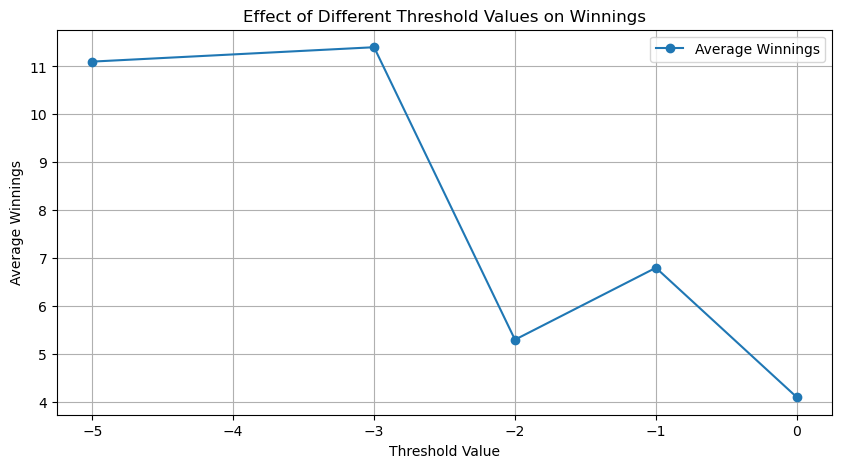

In [176]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(threshold_results["Threshold"], threshold_results["Average Winnings"], marker='o', label="Average Winnings")
plt.xlabel("Threshold Value")
plt.ylabel("Average Winnings")
plt.title("Effect of Different Threshold Values on Winnings")
plt.legend()
plt.grid(True)
plt.show()

In [180]:
### 10.

class RiskAdaptivePlayer(Player):
    """A strategy player that adapts risk-taking based on chip count."""
    
    def __init__(self, name, chips=100):
        super().__init__(name, chips)
        self.running_count = 0  

    def update_count(self, card):
        """Update count based on card values."""
        if card.rank in ['2', '3', '4', '5', '6']:
            self.running_count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count -= 1

    def determine_threshold(self):
        """Dynamically adjust hit threshold based on chip count."""
        if self.chips < 50:  
            return -5
        elif self.chips < 100:  
            return -2
        else:  
            return 0

    def make_decision(self, deck):
        """Decide to hit or stay based on dynamically adjusted threshold."""
        while self.hand.calculate_value() < 21:
            current_threshold = self.determine_threshold()
            if self.running_count <= current_threshold:
                card = deck.draw_card()
                self.hand.add_card(card)
                self.update_count(card)
            else:
                break


In [182]:
def compare_strategies(num_games=100, num_rounds=50, starting_chips=100, bet_amount=10):
    """Runs a simulation comparing the Card Counting Player vs Risk-Adaptive Player."""
    results = []

    for strategy in ["CardCountingPlayer", "RiskAdaptivePlayer"]:
        winnings = []

        for game in range(num_games):
            if strategy == "CardCountingPlayer":
                strategy_player = CardCountingPlayer("Counter", chips=starting_chips, hit_threshold=-2)
            else:
                strategy_player = RiskAdaptivePlayer("Risk-Adaptive", chips=starting_chips)

            other_players = [
                DealerPlayer("Dealer-Style Player 1", chips=starting_chips),
                DealerPlayer("Dealer-Style Player 2", chips=starting_chips),
                DealerPlayer("Dealer-Style Player 3", chips=starting_chips)
            ]
            dealer = Dealer()
            deck = Deck()

            for round_num in range(num_rounds):
                if strategy_player.chips <= 0:
                    break  

                # Reset hands
                for player in [strategy_player] + other_players:
                    player.hand = Hand()
                dealer.hand = Hand()

                # Players place bets
                for player in [strategy_player] + other_players:
                    player.place_bet(bet_amount)

                # Initial dealing
                for _ in range(2):
                    for player in [strategy_player] + other_players:
                        card = deck.draw_card()
                        player.hand.add_card(card)
                        if isinstance(player, (CardCountingPlayer, RiskAdaptivePlayer)):
                            player.update_count(card)
                    dealer.hand.add_card(deck.draw_card())

                # Players' turns
                strategy_player.make_decision(deck)
                for player in other_players:
                    player.make_decision(deck)

                # Dealer's turn
                dealer.play_turn(deck)

                # Determine results
                dealer_value = dealer.hand.calculate_value()
                for player in [strategy_player] + other_players:
                    player_value = player.hand.calculate_value()

                    if player_value > 21:
                        pass  # Already lost bet
                    elif dealer_value > 21 or player_value > dealer_value:
                        player.chips += bet_amount * 2  
                    elif player_value == dealer_value:
                        player.chips += bet_amount  

            # Store final chips of the strategy player
            winnings.append(strategy_player.chips)

        # Compute statistics
        winnings = np.array(winnings)
        avg_winnings = np.mean(winnings)
        std_dev = np.std(winnings)
        prob_winning = np.sum(winnings > 100) / len(winnings)
        prob_losing = np.sum(winnings < 100) / len(winnings)

        results.append([strategy, avg_winnings, std_dev, prob_winning, prob_losing])

    return pd.DataFrame(results, columns=["Strategy", "Average Winnings", "Std Dev", "Prob Winning", "Prob Losing"])

# Run the comparison
strategy_comparison_results = compare_strategies()






Counter running count: 1
Counter stays.
Dealer's final hand: Hand: 10 of Diamonds, 6 of Diamonds, Q of Hearts (Value: 26)
Counter running count: 3
Counter stays.
Dealer's final hand: Hand: 6 of Spades, 7 of Spades, 3 of Clubs, 5 of Diamonds (Value: 21)
Counter running count: 1
Counter stays.
Dealer's final hand: Hand: 3 of Hearts, A of Hearts, K of Clubs, K of Diamonds (Value: 24)
Counter running count: 3
Counter stays.
Dealer's final hand: Hand: 7 of Clubs, 2 of Hearts, Q of Diamonds (Value: 19)
Counter running count: 3
Counter stays.
Dealer's final hand: Hand: 9 of Clubs, Q of Hearts (Value: 19)
Counter running count: 4
Counter stays.
Dealer's final hand: Hand: 9 of Hearts, Q of Clubs (Value: 19)
Counter running count: 4
Counter stays.
Dealer's final hand: Hand: Q of Spades, Q of Diamonds (Value: 20)
Dealer's final hand: Hand: 9 of Diamonds, 6 of Clubs, J of Diamonds (Value: 25)
Counter running count: 3
Counter stays.
Dealer's final hand: Hand: J of Hearts, J of Clubs (Value: 20)
Cou

In [184]:
strategy_comparison_results

Strategy  Average Winnings    Std Dev  Prob Winning  Prob Losing
0  CardCountingPlayer               7.8  19.574473          0.00         0.99
1  RiskAdaptivePlayer               5.8  20.502683          0.01         0.98

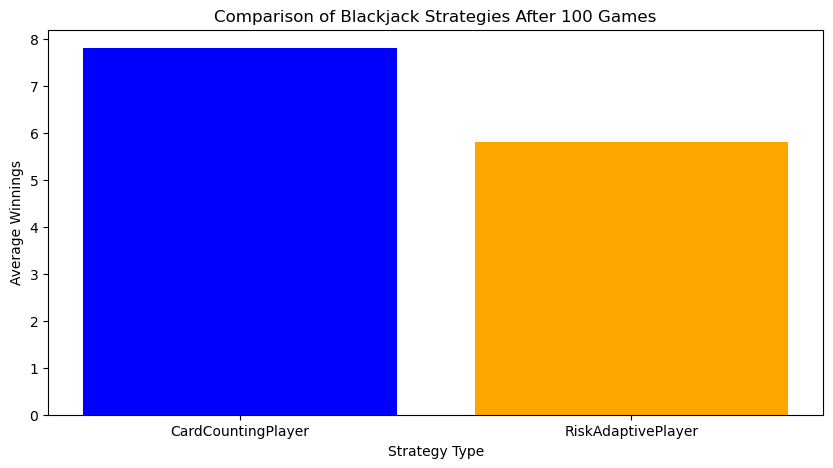

In [186]:
# Plot results
plt.figure(figsize=(10, 5))
plt.bar(strategy_comparison_results["Strategy"], strategy_comparison_results["Average Winnings"], color=['blue', 'orange'])
plt.xlabel("Strategy Type")
plt.ylabel("Average Winnings")
plt.title("Comparison of Blackjack Strategies After 100 Games")
plt.show()

### Lab 7

In [189]:
### Exercise 2: Download SUSY Dataset

!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  6909k      0 --:--:--  0:02:10 --:--:-- 5854kM      0 --:--:--  0:00:16 --:--:-- 8337k 0  326M    0     0   9.9M      0 --:--:--  0:00:32 --:--:-- 8793k--  0:01:30 --:--:-- 5667k    0     0  7143k      0 --:--:--  0:01:31 --:--:-- 5666k79k


In [190]:
!rm SUSY.csv

rm: SUSY.csv: No such file or directory


In [191]:
!gunzip SUSY.csv.gz

In [195]:
ls -lh

total 4679112
-rw-r--r--  1 lauratm  staff    35K Feb 14 13:05 Lab.3_Solutions.ipynb
-rw-r--r--  1 lauratm  staff    41K Feb 21 15:41 Lab.4_Solutions.ipynb
-rw-r--r--  1 lauratm  staff    32K Feb 28 14:04 Lab.5_Solutions.ipynb
-rw-r--r--  1 lauratm  staff   4.0M Mar 19 09:04 Lab.6_Solutions.ipynb
-rw-r--r--  1 lauratm  staff   2.2G Mar 19 09:04 SUSY.csv
-rw-r--r--  1 lauratm  staff    25K Jan 31 14:33 Solution.Lab.2.ipynb
-rw-r--r--  1 lauratm  staff    30K Feb 28 14:17 Solutions_Lab.5.ipynb
-rw-r--r--  1 lauratm  staff   154K Mar 18 19:14 blackjack_uml.png
-rw-r--r--  1 lauratm  staff   153B Feb 21 15:39 drawing.txt
-rw-r--r--@ 1 lauratm  staff   131B Feb 21 13:48 raster_drawing.txt


In [197]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [201]:
#### Reducing the dataset
!wc -l SUSY.csv

 5000000 SUSY.csv


In [203]:
!head -500000 SUSY.csv > SUSY-small.csv

In [205]:
ls -lh

total 5145976
-rw-r--r--  1 lauratm  staff    35K Feb 14 13:05 Lab.3_Solutions.ipynb
-rw-r--r--  1 lauratm  staff    41K Feb 21 15:41 Lab.4_Solutions.ipynb
-rw-r--r--  1 lauratm  staff    32K Feb 28 14:04 Lab.5_Solutions.ipynb
-rw-r--r--  1 lauratm  staff   4.0M Mar 19 09:06 Lab.6_Solutions.ipynb
-rw-r--r--  1 lauratm  staff   228M Mar 19 09:06 SUSY-small.csv
-rw-r--r--  1 lauratm  staff   2.2G Mar 19 09:04 SUSY.csv
-rw-r--r--  1 lauratm  staff    25K Jan 31 14:33 Solution.Lab.2.ipynb
-rw-r--r--  1 lauratm  staff    30K Feb 28 14:17 Solutions_Lab.5.ipynb
-rw-r--r--  1 lauratm  staff   154K Mar 18 19:14 blackjack_uml.png
-rw-r--r--  1 lauratm  staff   153B Feb 21 15:39 drawing.txt
-rw-r--r--@ 1 lauratm  staff   131B Feb 21 13:48 raster_drawing.txt


In [207]:
! wc -l SUSY-small.csv

  500000 SUSY-small.csv


In [209]:
#### First look

VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

In [211]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [213]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [215]:
FeatureNames

['M_Delta_R',
 'R',
 'cos_theta_r1',
 'MT2',
 'dPhi_r_b',
 'M_TR_2',
 'S_R',
 'axial_MET',
 'M_R',
 'MET_rel']

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0           0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1           1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2           1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3           1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4           1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...         ...       ...       ...       ...       ...       ...       ...   
4999995     1.0  0.853325 -0.961783 -1.487277  0.678190  0.493580  1.647969   
4999996     0.0  0.951581  0.139370  1.436884  0.880440 -0.351948 -0.740852   
4999997     0.0  0.840389  1.419162 -1.218766  1.195631  1.695645  0.663756   
4999998     1.0  1.784218 -0.833565 -0.560091  0.953342 -0.688969 -1.428233   
4999999     0.0  0.761500  0.680454 -1.186213  1.043521 -0.316755  0.246879   

              MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
0        0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637   
1        3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051   
2        1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514   
3        2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211   
4        1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218   
...           ...       ...       ...        ...       ...       ...   
4999995  1.843867  0.276954  1.025105  -1.486535  0.892879  1.684429   
4999996  0.290863 -0.732360  0.001360   0.257738  0.802871  0.545319   
4999997  0.490888 -0.509186  0.704289   0.045744  0.825015  0.723530   
4999998  2.660703 -0.861344  2.116892   2.906151  1.232334  0.952444   
4999999  1.120280  0.998479  1.640881  -0.797688  0.854212  1.121858   

                R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0        0.410772  1.145621  1.932632   0.994464  1.367815      0.040714  
1        0.481928  0.000000  0.448410   0.205356  1.321893      0.377584  
2        1.587535  2.024308  0.603498   1.562374  1.135454      0.180910  
3        1.582217  1.551914  0.761215   1.715464  1.492257      0.090719  
4        0.728563  0.000000  1.083158   0.043429  1.154854      0.094859  
...           ...       ...       ...        ...       ...           ...  
4999995  1.674084  3.366298  1.046707   2.646649  1.389226      0.364599  
4999996  0.602730  0.002998  0.748959   0.401166  0.443471      0.239953  
4999997  0.778236  0.752942  0.838953   0.614048  1.210595      0.026692  
4999998  0.685846  0.000000  0.781874   0.676003  1.197807      0.093689  
4999999  1.165438  1.498351  0.931580   1.293524  1.539167      0.187496  

[5000000 rows x 19 columns]

In [221]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

l_1_pT


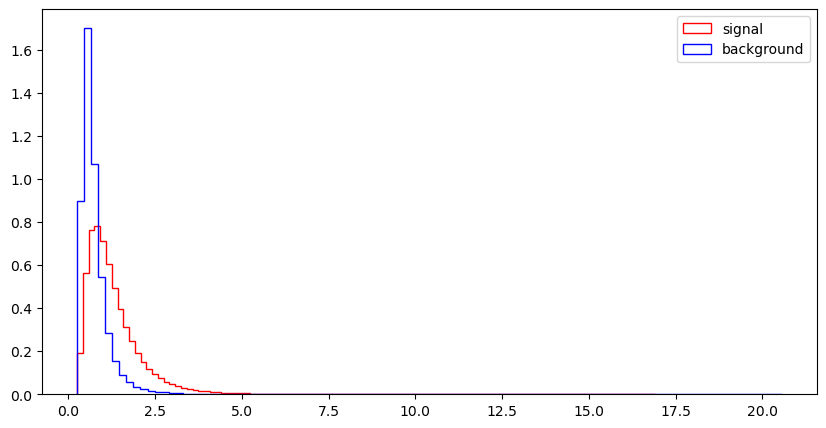

l_1_eta


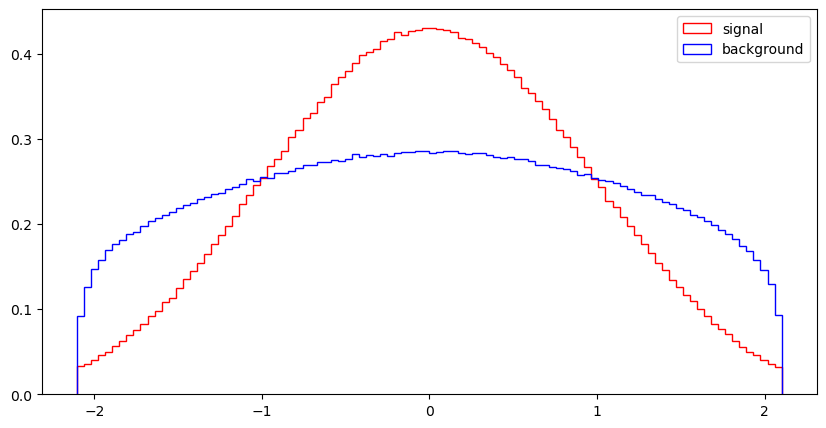

l_1_phi


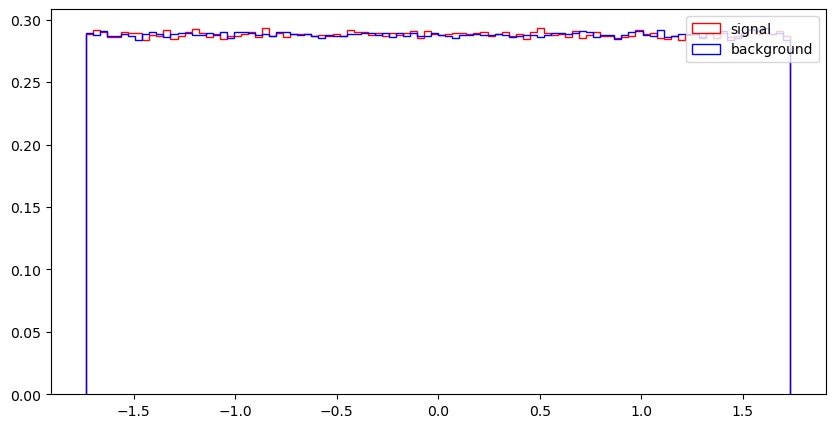

l_2_pT


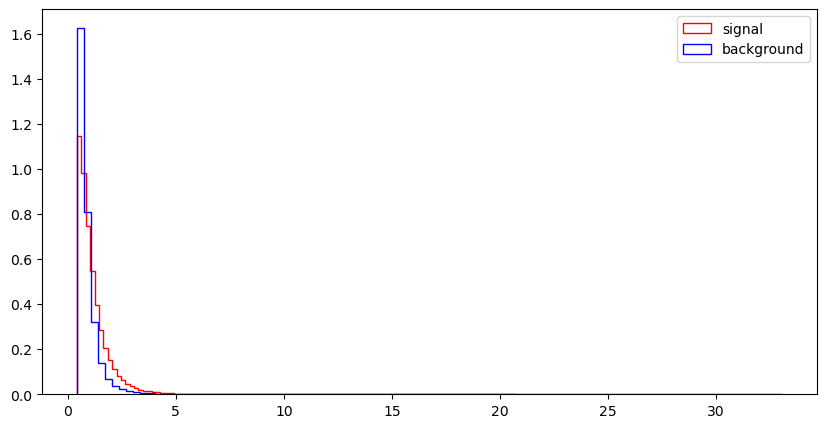

l_2_eta


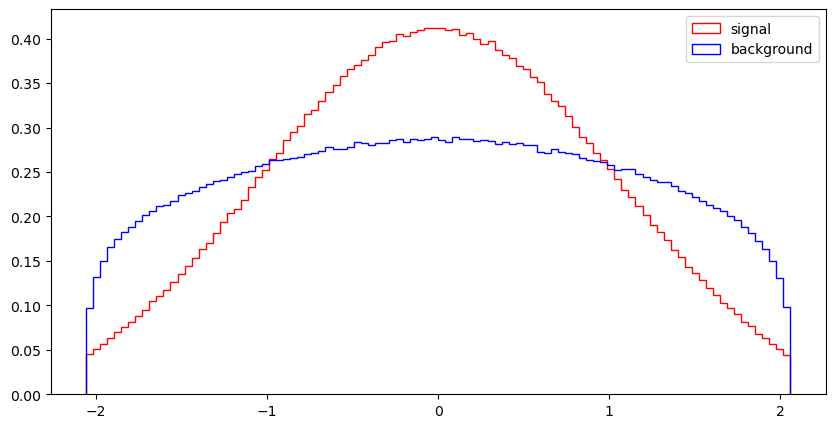

l_2_phi


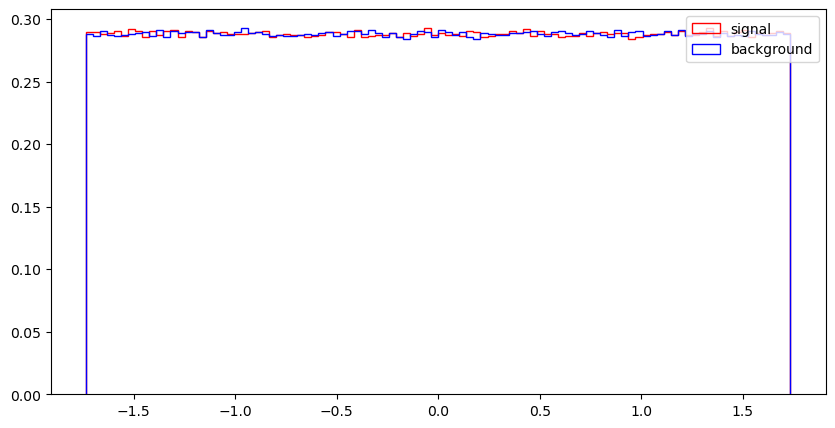

MET


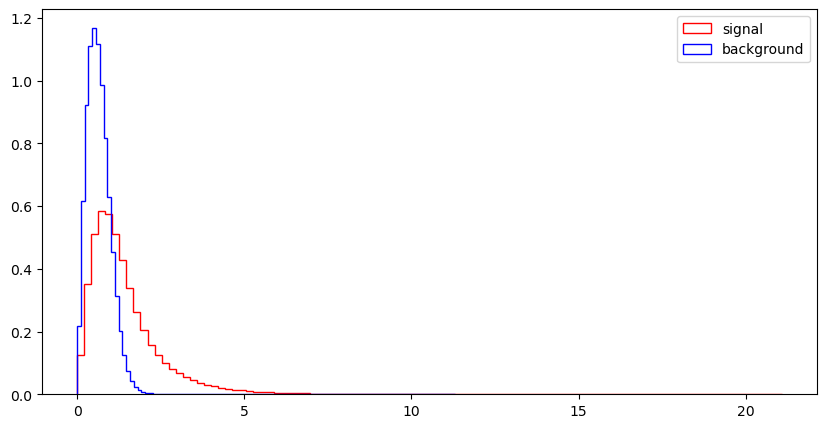

MET_phi


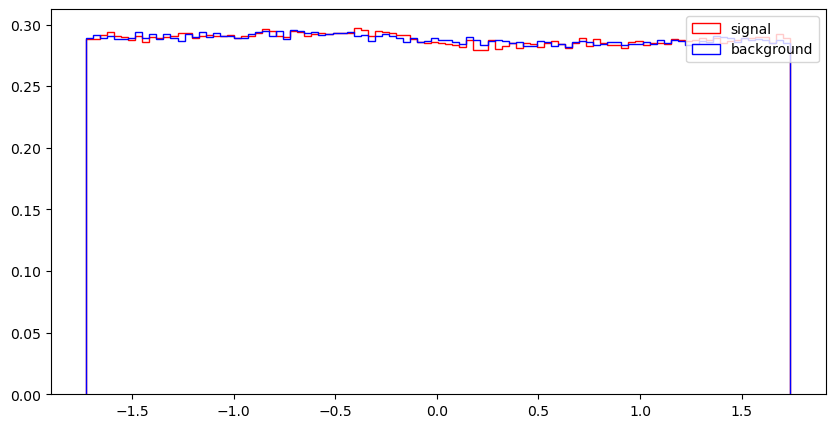

MET_rel


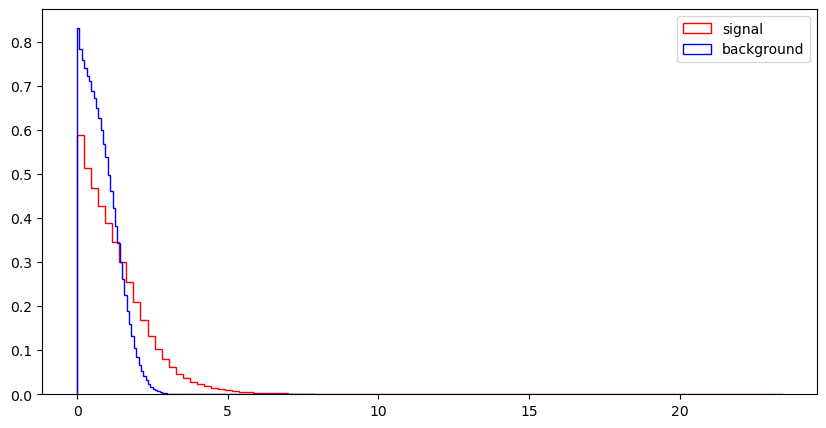

axial_MET


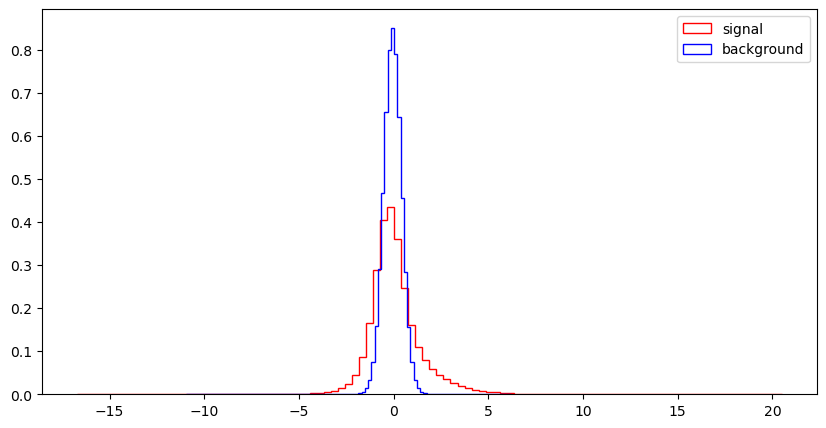

M_R


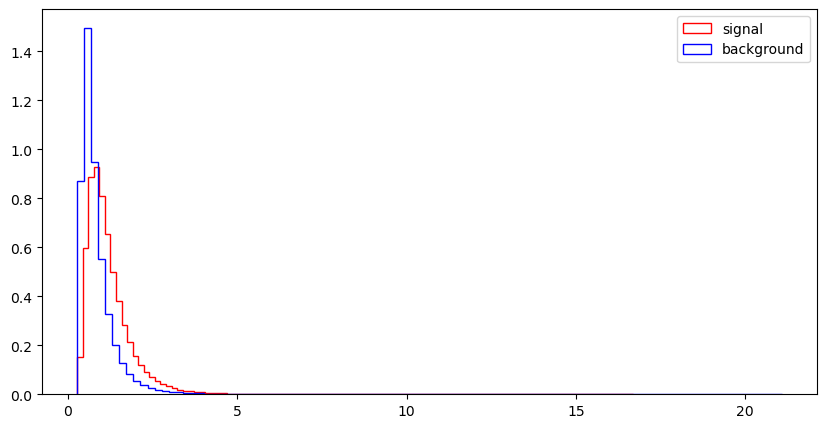

M_TR_2


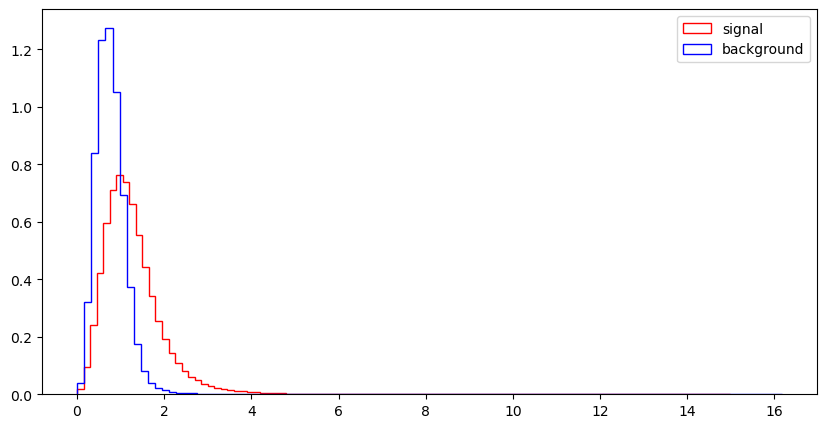

R


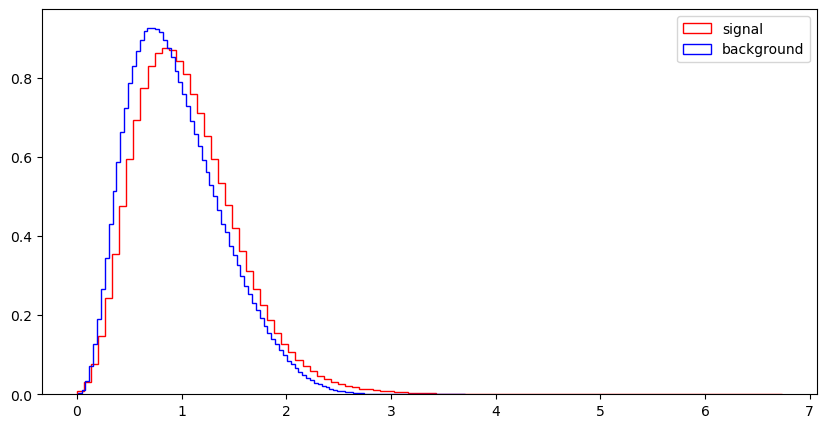

MT2


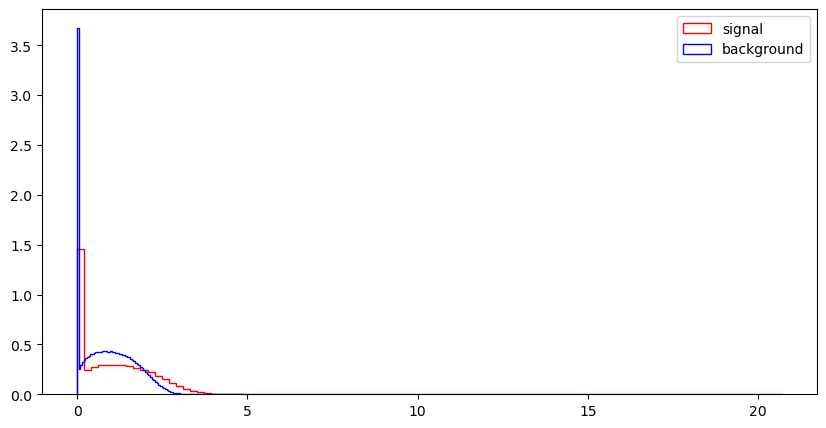

S_R


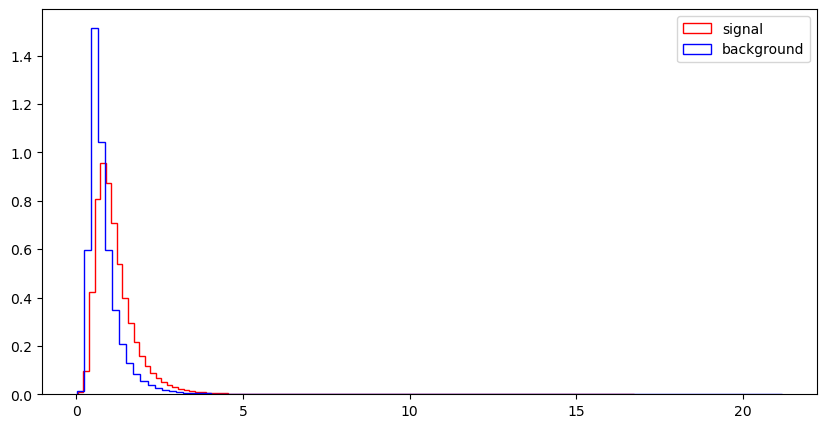

M_Delta_R


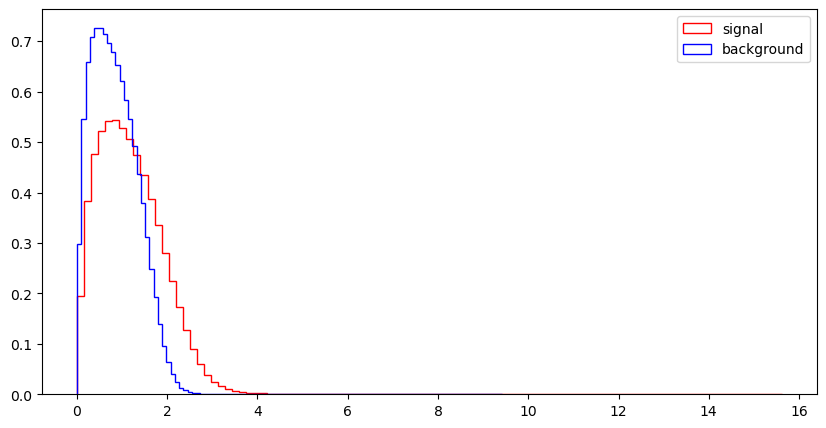

dPhi_r_b


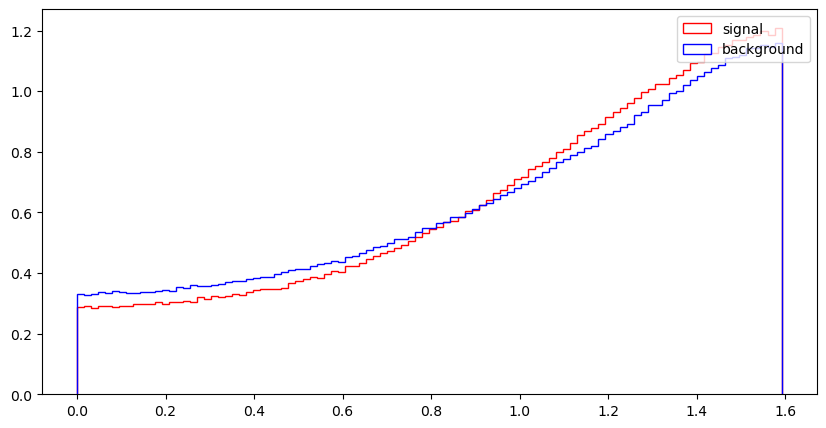

cos_theta_r1


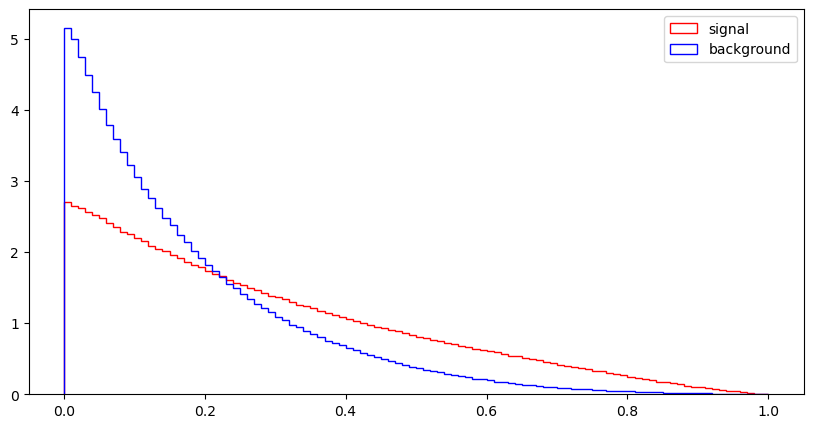

In [223]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

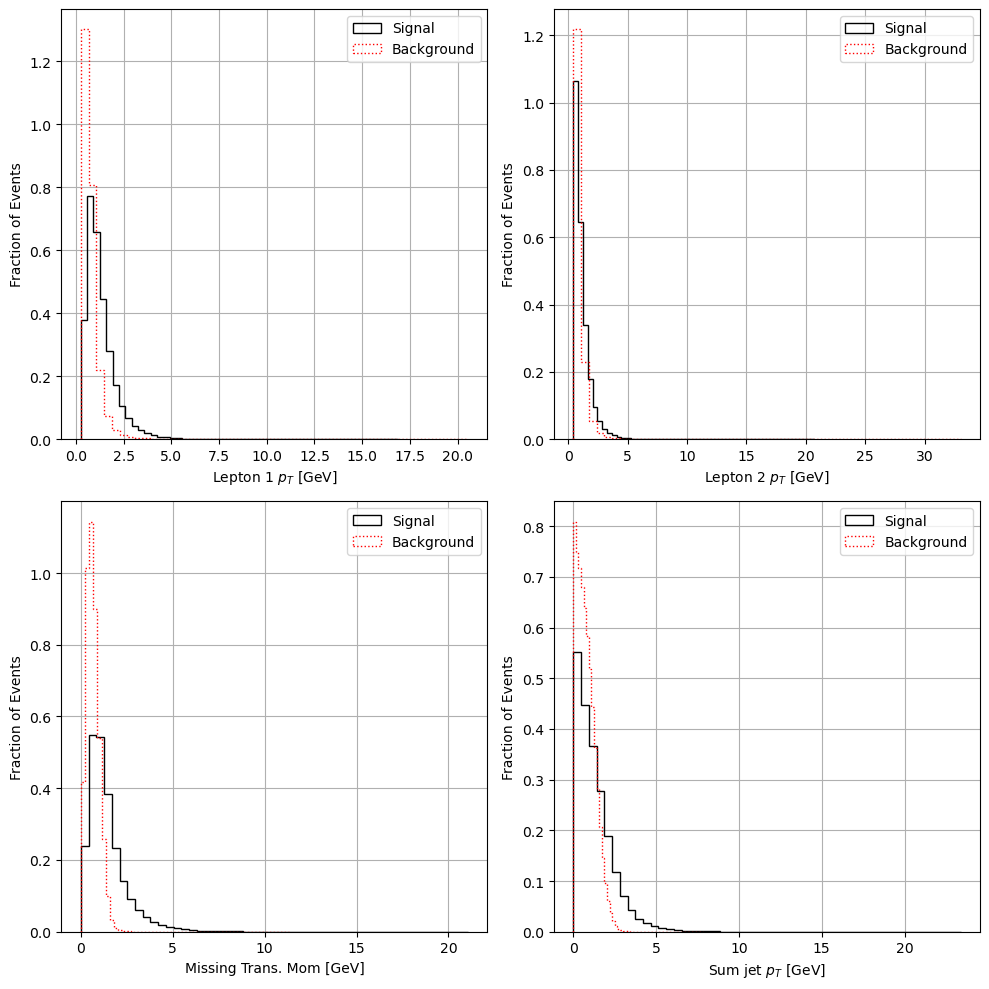

In [229]:
### Exercise 3: Make nice figures
#### FIG 5

low_level_features = ["l_1_pT", "l_2_pT", "MET", "MET_rel"]  # Approximate Sum jet pT with MET_rel
plot_labels = [
    "Lepton 1 $p_T$ [GeV]",
    "Lepton 2 $p_T$ [GeV]",
    "Missing Trans. Mom [GeV]",
    "Sum jet $p_T$ [GeV]"  # Approximate with MET_rel
]

# Plot settings
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) s
axes = axes.flatten()

for i, feature in enumerate(low_level_features):
    ax = axes[i]
    ax.hist(df_sig[feature], bins=50, histtype="step", color="black", label="Signal", density=True)
    ax.hist(df_bkg[feature], bins=50, histtype="step", color="red", linestyle="dotted", label="Background", density=True)
    ax.set_xlabel(plot_labels[i])
    ax.set_ylabel("Fraction of Events")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


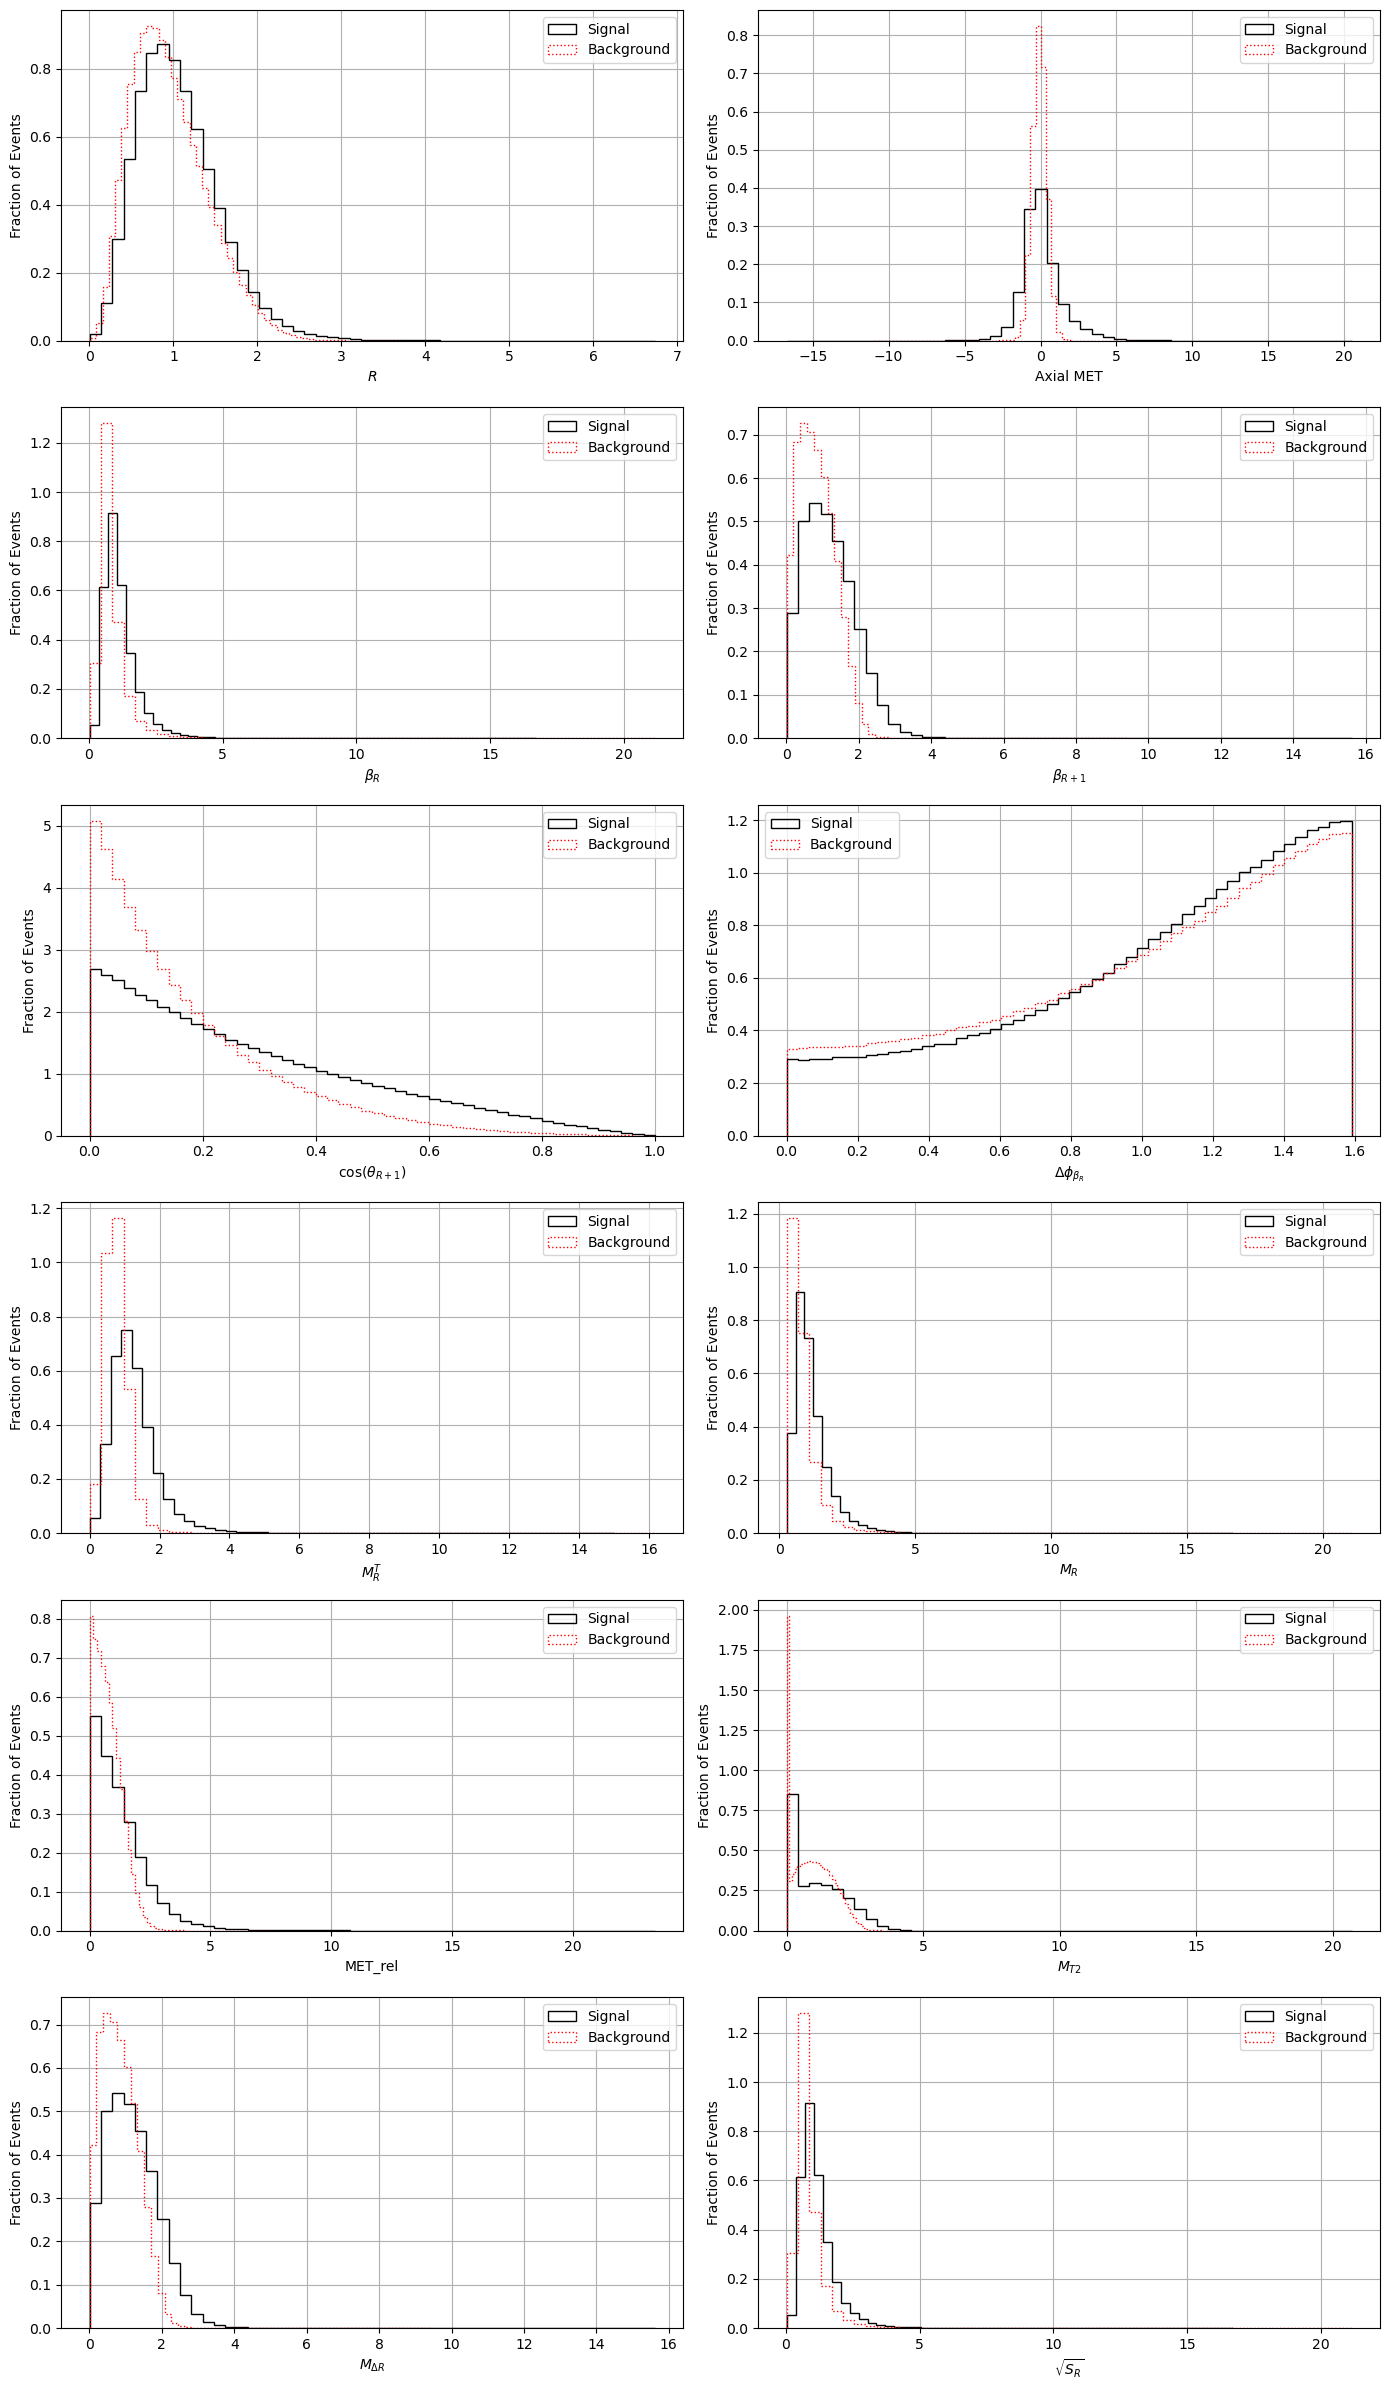

In [239]:
#### FIG 6

high_level_features = [
    "R", "axial_MET", "S_R", "M_Delta_R", "cos_theta_r1", "dPhi_r_b",
    "M_TR_2", "M_R", "MET_rel", "MT2", "M_Delta_R", "S_R"
]


plot_labels = [
    r"$R$", "Axial MET", r"$\beta_R$", r"$\beta_{R+1}$", r"$\cos(\theta_{R+1})$", r"$\Delta \phi_{\beta_R}$",
    r"$M^T_R$", r"$M_R$", "MET_rel", r"$M_{T2}$", r"$M_{\Delta R}$", r"$\sqrt{S_R}$"
]


fig, axes = plt.subplots(6, 2, figsize=(14, 24))  
axes = axes.flatten()

for i, feature in enumerate(high_level_features):
    ax = axes[i]
    ax.hist(df_sig[feature], bins=50, histtype="step", color="black", label="Signal", density=True)
    ax.hist(df_bkg[feature], bins=50, histtype="step", color="red", linestyle="dotted", label="Background", density=True)
    ax.set_xlabel(plot_labels[i])
    ax.set_ylabel("Fraction of Events")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

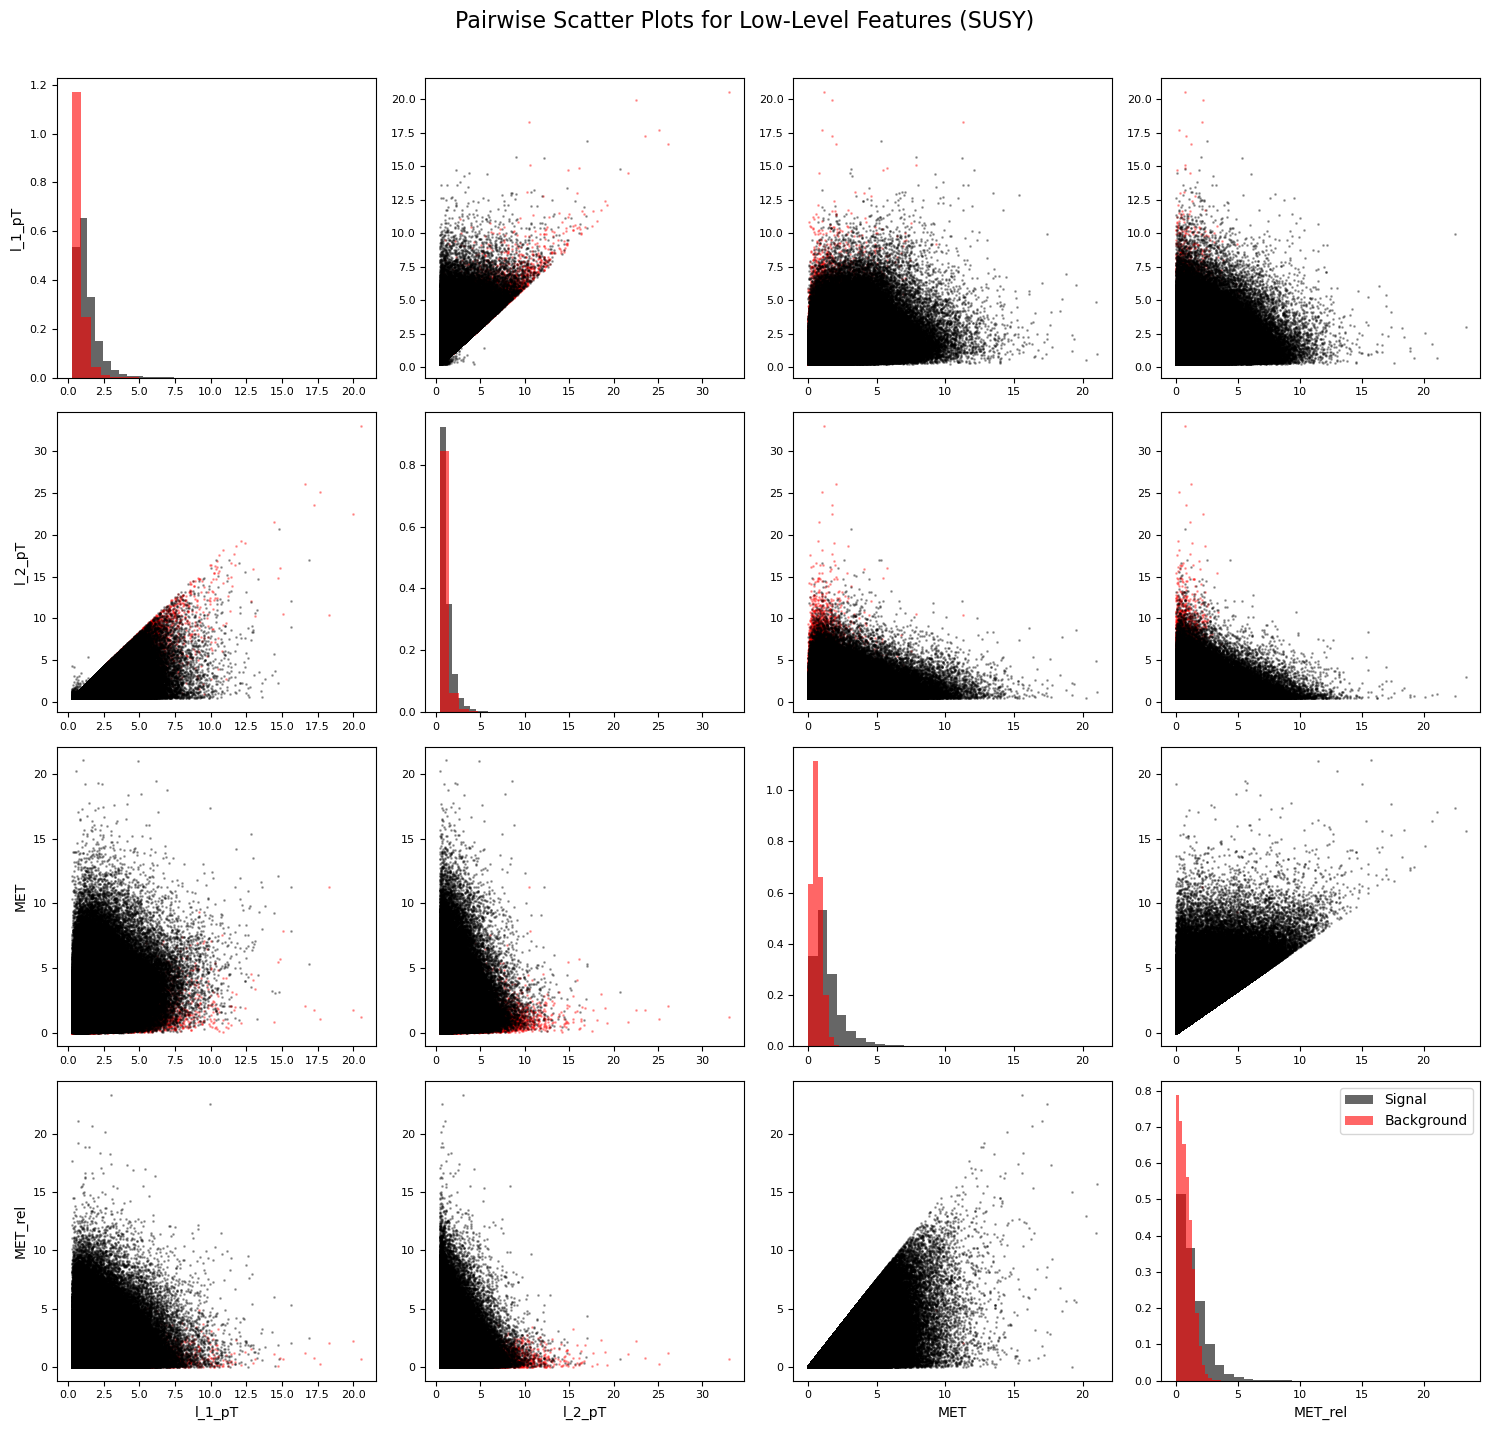

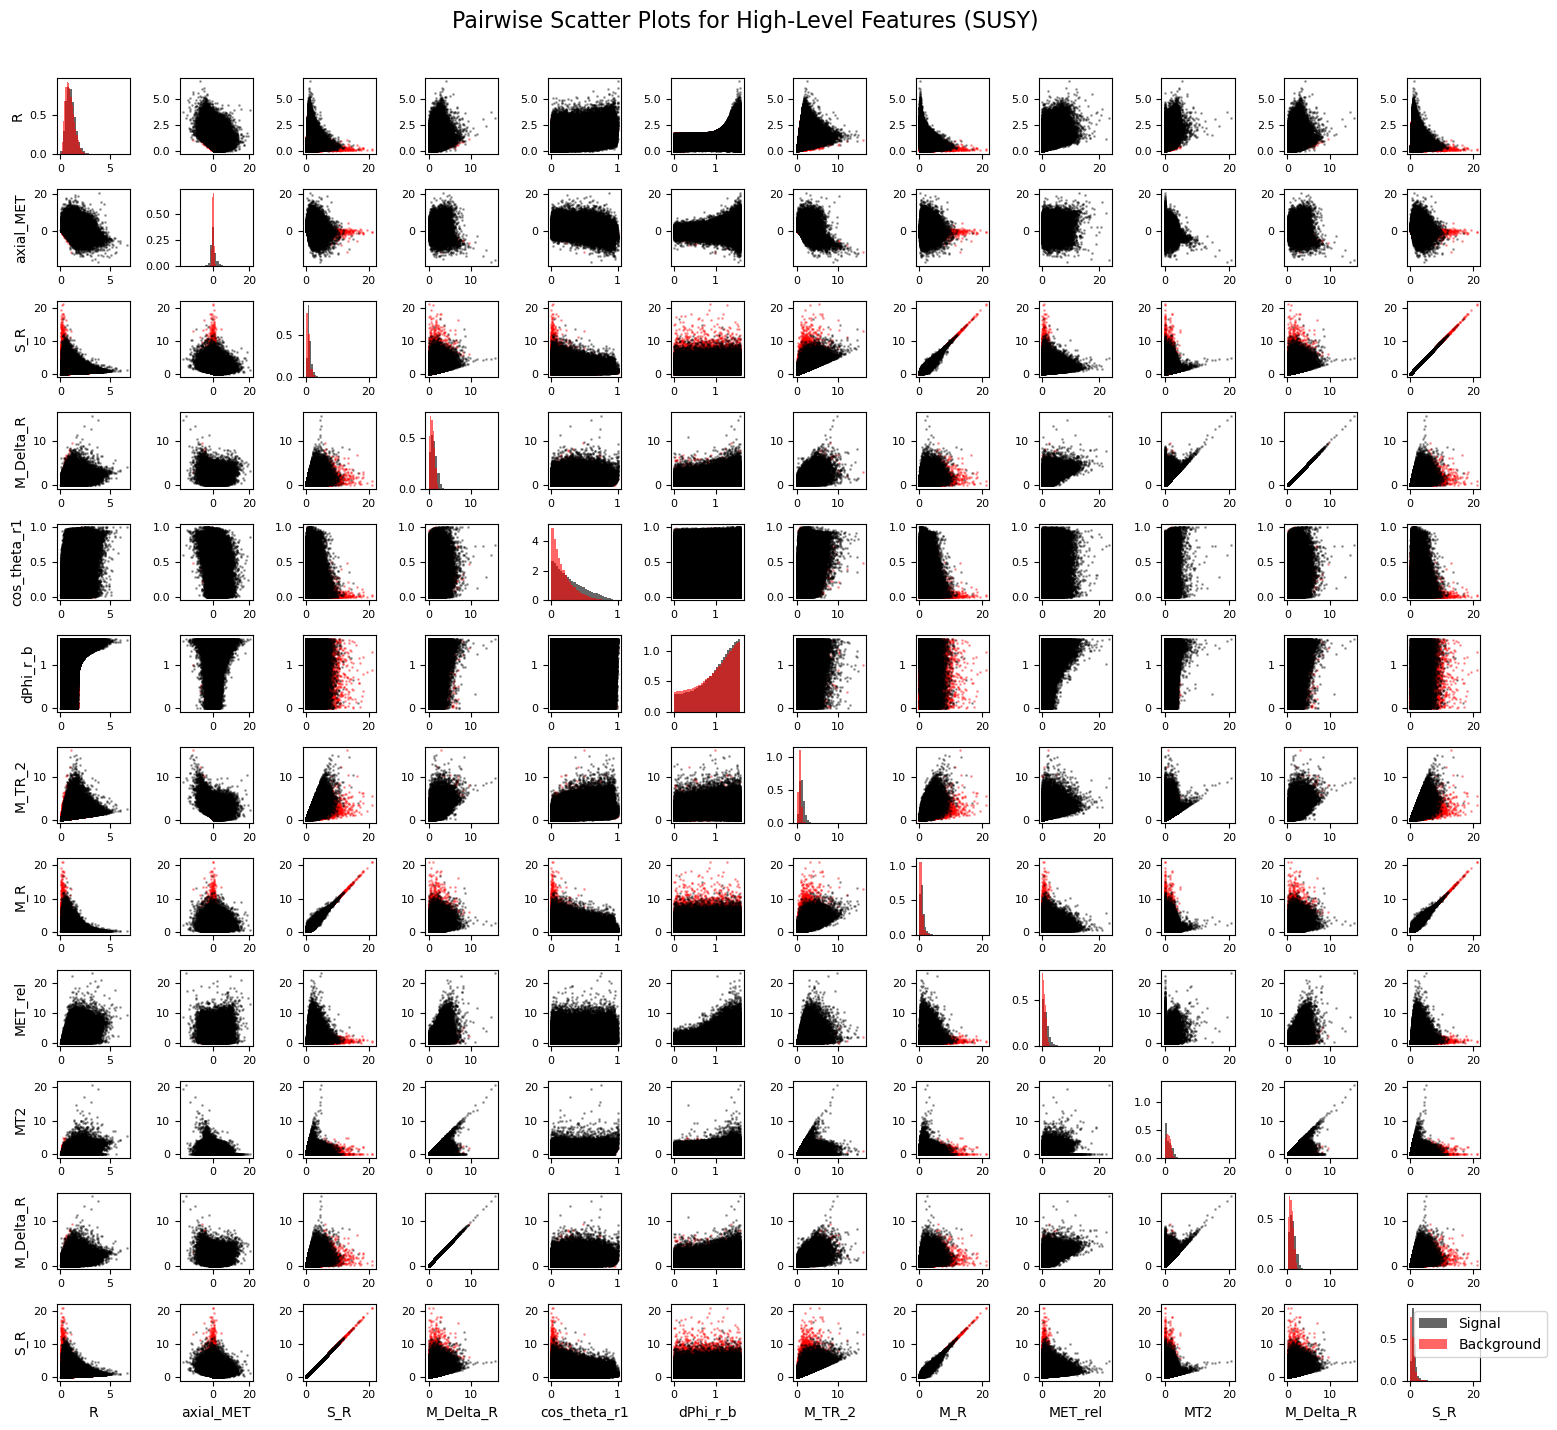

In [241]:
### Exercise 4: Correlation

#### Exercise 4.1

##### Part a

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def pair_plot_matrix(df, features, title):
    """Create pairwise scatter plots for given features."""
    num_features = len(features)
    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
    
    # Separate signal and background
    df_sig = df[df["signal"] == 1]
    df_bkg = df[df["signal"] == 0]

    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            ax = axes[i, j]
            
            if i == j:
                # Diagonal: Histograms of each feature
                ax.hist(df_sig[feature1], bins=30, color="black", alpha=0.6, label="Signal", density=True)
                ax.hist(df_bkg[feature1], bins=30, color="red", linestyle="dotted", alpha=0.6, label="Background", density=True)
            else:
                # Off-diagonal: Scatter plots
                ax.scatter(df_bkg[feature2], df_bkg[feature1], color="red", s=1, alpha=0.3, label="Background")
                ax.scatter(df_sig[feature2], df_sig[feature1], color="black", s=1, alpha=0.3, label="Signal")

            # Labels
            if j == 0:
                ax.set_ylabel(feature1)
            if i == num_features - 1:
                ax.set_xlabel(feature2)

            ax.tick_params(axis="both", which="both", labelsize=8)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.legend()
    plt.show()




pair_plot_matrix(df, low_level_features, "Pairwise Scatter Plots for Low-Level Features (SUSY)")
pair_plot_matrix(df, high_level_features, "Pairwise Scatter Plots for High-Level Features (SUSY)")


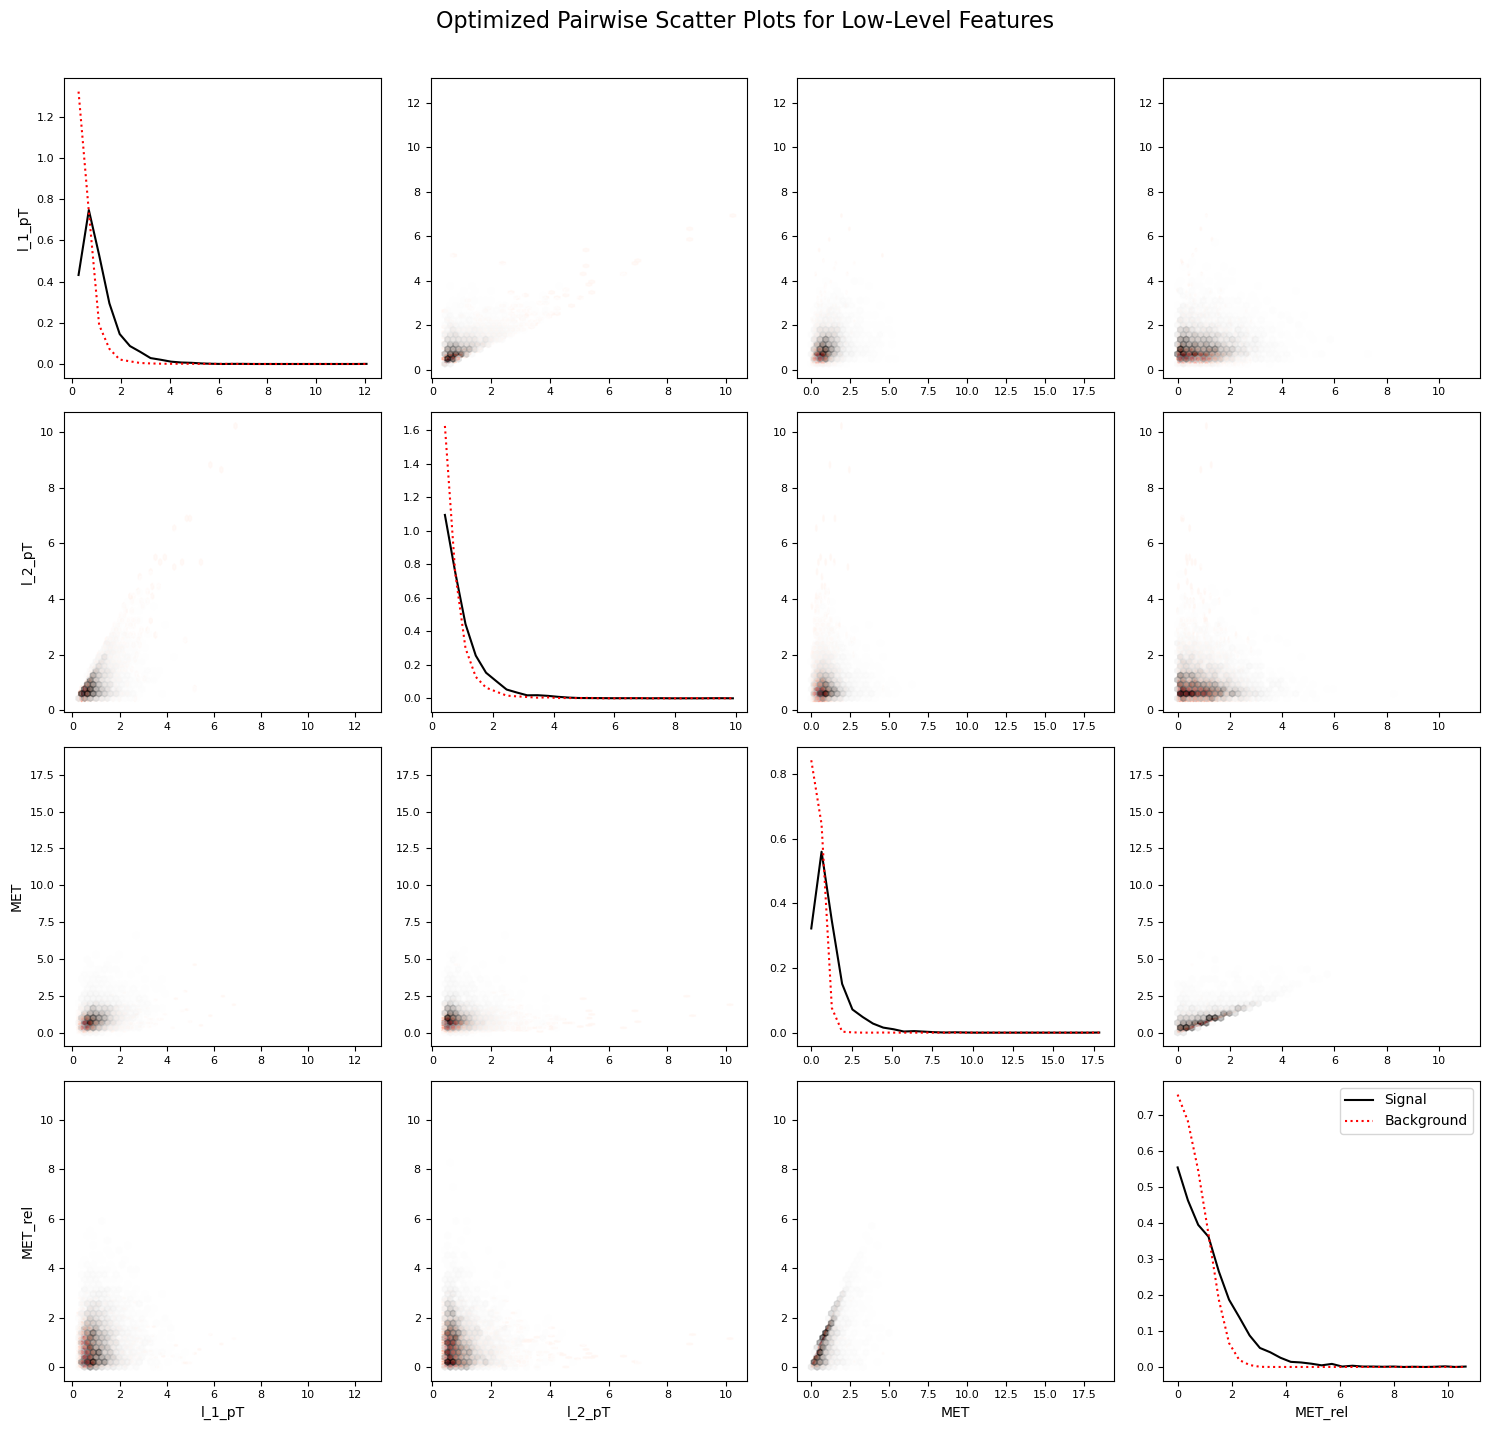

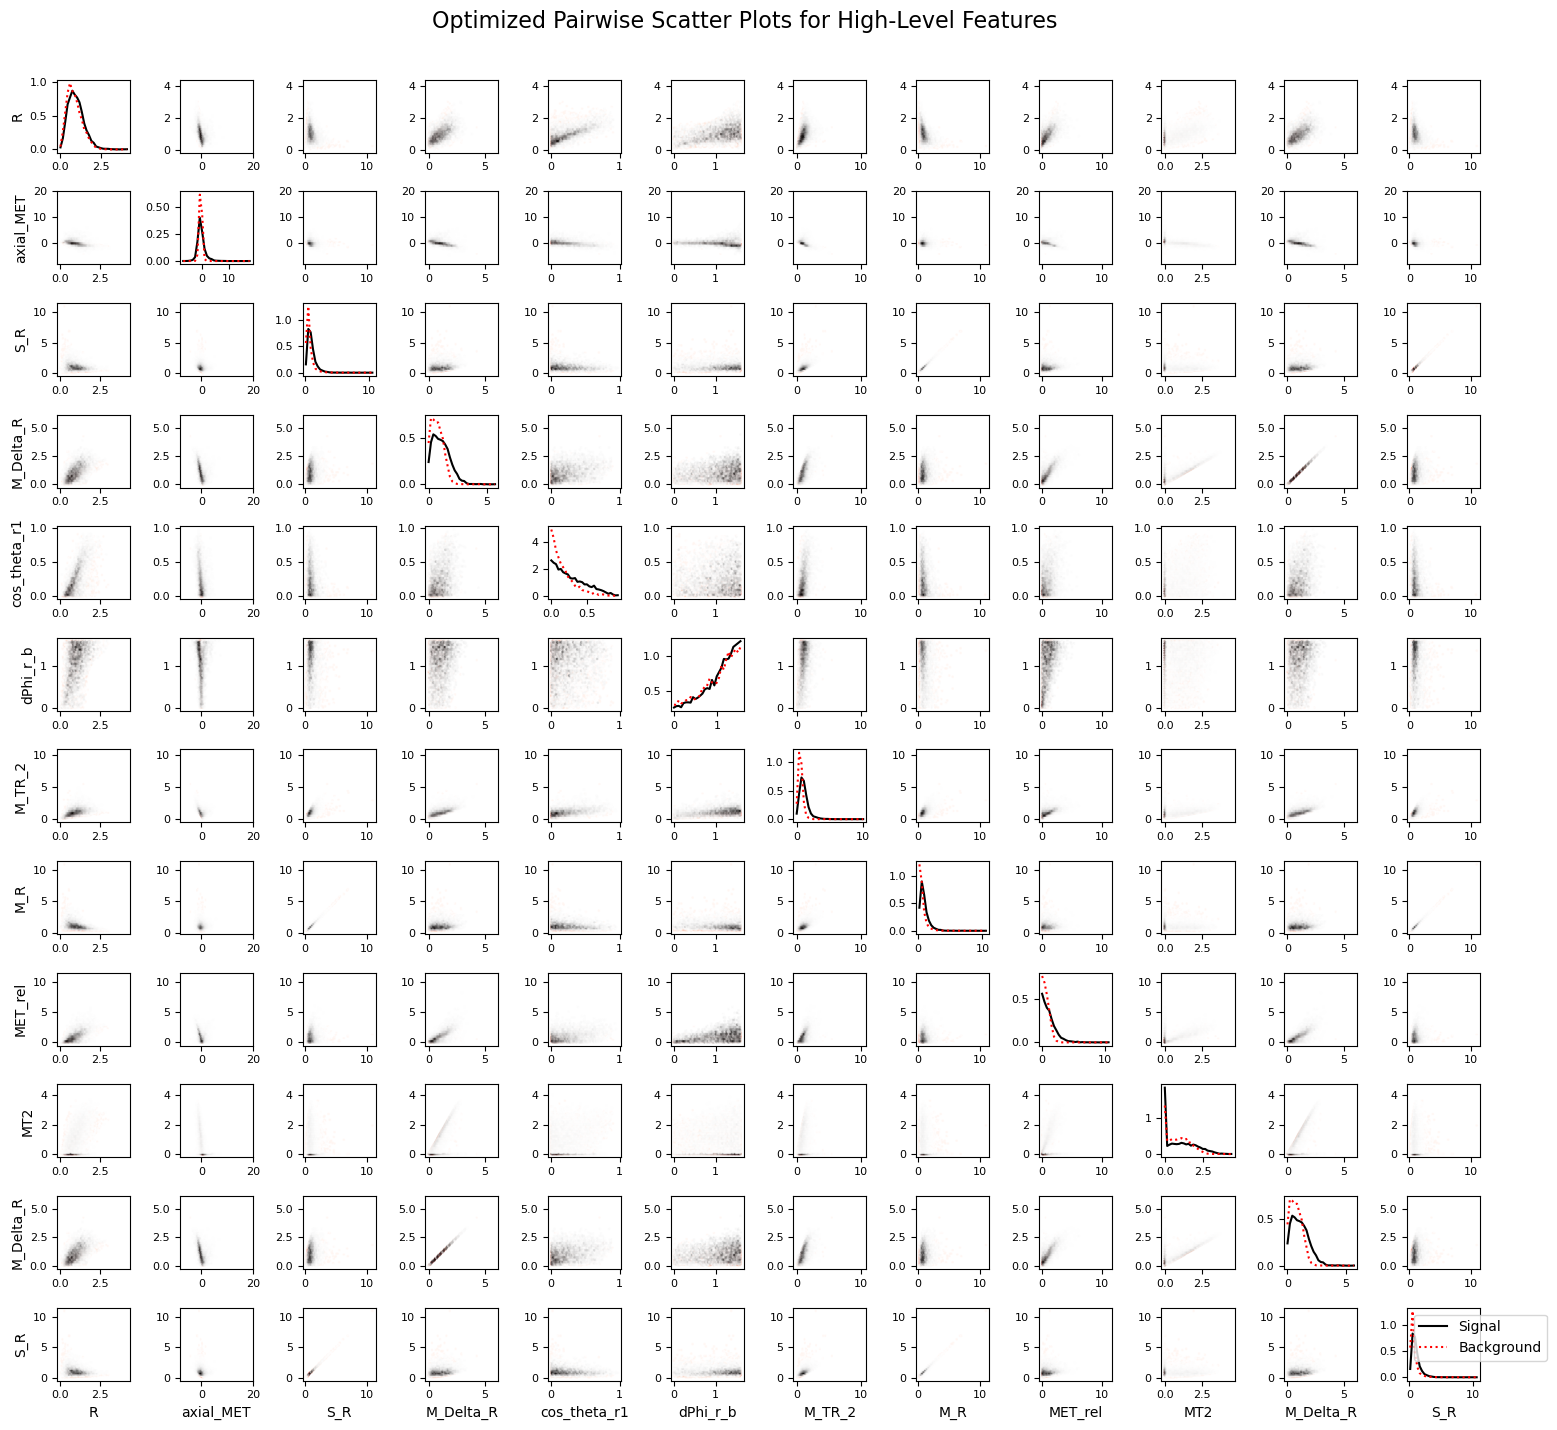

In [245]:
##### Part b

# Optimized function to create pair plots efficiently
def optimized_pair_plot_matrix(df, features, title, sample_size=10000):
    
    # Take a random sample to speed up computation
    df_sample = df.sample(n=min(sample_size, len(df)), random_state=42)

    # Separate signal and background
    df_sig = df_sample[df_sample["signal"] == 1]
    df_bkg = df_sample[df_sample["signal"] == 0]

    num_features = len(features)
    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
    
    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            ax = axes[i, j]
            
            if i == j:
                # Diagonal: Use np.histogram for faster histograms
                bins = np.linspace(df_sample[feature1].min(), df_sample[feature1].max(), 30)
                hist_sig, _ = np.histogram(df_sig[feature1], bins=bins, density=True)
                hist_bkg, _ = np.histogram(df_bkg[feature1], bins=bins, density=True)
                
                ax.plot(bins[:-1], hist_sig, color="black", label="Signal")
                ax.plot(bins[:-1], hist_bkg, color="red", linestyle="dotted", label="Background")
            
            else:
                # Off-diagonal: Use hexbin instead of scatter for faster density visualization
                ax.hexbin(df_bkg[feature2], df_bkg[feature1], gridsize=50, cmap="Reds", mincnt=1, alpha=0.5)
                ax.hexbin(df_sig[feature2], df_sig[feature1], gridsize=50, cmap="Greys", mincnt=1, alpha=0.5)
            
            # Labels
            if j == 0:
                ax.set_ylabel(feature1)
            if i == num_features - 1:
                ax.set_xlabel(feature2)

            ax.tick_params(axis="both", which="both", labelsize=8)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.legend()
    plt.show()


optimized_pair_plot_matrix(df, low_level_features, "Optimized Pairwise Scatter Plots for Low-Level Features")
optimized_pair_plot_matrix(df, high_level_features, "Optimized Pairwise Scatter Plots for High-Level Features")


##### Part c

"" Which observables appear to be best for separating signal from background?: MET_rel, cos_theta_r1, M_Delta_R """"


In [249]:
####Exercise 4.2

##### Part a

!pip install tabulate


In [251]:
import tabulate
print("Tabulate installed successfully!")

Tabulate installed successfully!


In [253]:
##### Part b

# Compute covariance and correlation matrices for all features
cov_matrix_all = np.cov(df[VarNames[1:]].values, rowvar=False)
corr_matrix_all = np.corrcoef(df[VarNames[1:]].values, rowvar=False)

# Compute covariance and correlation matrices for low-level features
cov_matrix_low = np.cov(df[low_level_features].values, rowvar=False)
corr_matrix_low = np.corrcoef(df[low_level_features].values, rowvar=False)

# Compute covariance and correlation matrices for high-level features
cov_matrix_high = np.cov(df[high_level_features].values, rowvar=False)
corr_matrix_high = np.corrcoef(df[high_level_features].values, rowvar=False)

# Convert results to DataFrames for better visualization
cov_df_all = pd.DataFrame(cov_matrix_all, index=VarNames[1:], columns=VarNames[1:])
corr_df_all = pd.DataFrame(corr_matrix_all, index=VarNames[1:], columns=VarNames[1:])

cov_df_low = pd.DataFrame(cov_matrix_low, index=low_level_features, columns=low_level_features)
corr_df_low = pd.DataFrame(corr_matrix_low, index=low_level_features, columns=low_level_features)

cov_df_high = pd.DataFrame(cov_matrix_high, index=high_level_features, columns=high_level_features)
corr_df_high = pd.DataFrame(corr_matrix_high, index=high_level_features, columns=high_level_features)

# Print the results
print("Covariance Matrix (All Features):\n", cov_df_all, "\n")
print("Correlation Matrix (All Features):\n", corr_df_all, "\n")
print("Covariance Matrix (Low-Level Features):\n", cov_df_low, "\n")
print("Correlation Matrix (Low-Level Features):\n", corr_df_low, "\n")
print("Covariance Matrix (High-Level Features):\n", cov_df_high, "\n")
print("Correlation Matrix (High-Level Features):\n", corr_df_high, "\n")

Covariance Matrix (All Features):
                 l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
l_1_pT        0.472428 -0.000263 -0.000229  0.307887 -0.000302  0.000227   
l_1_eta      -0.000263  1.006224  0.000322 -0.000378  0.405877  0.000297   
l_1_phi      -0.000229  0.000322  1.003342 -0.000129  0.000641 -0.268130   
l_2_pT        0.307887 -0.000378 -0.000129  0.428004 -0.000454  0.000115   
l_2_eta      -0.000302  0.405877  0.000641 -0.000454  1.005686 -0.000065   
l_2_phi       0.000227  0.000297 -0.268130  0.000115 -0.000065  1.003265   
MET           0.230951 -0.000558  0.001200  0.079704  0.000051  0.000004   
MET_phi      -0.000676 -0.000541 -0.184184 -0.001388 -0.000126 -0.034468   
MET_rel       0.098567 -0.000497  0.001529 -0.002259  0.000130  0.000214   
axial_MET    -0.012512 -0.000498 -0.001965  0.049797 -0.000170 -0.000091   
M_R           0.368085 -0.000308 -0.000200  0.328115 -0.000549  0.000287   
M_TR_2        0.290831 -0.000266  0.000838  0.164385 

In [261]:
cov_df_all

l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
l_1_pT        0.472428 -0.000263 -0.000229  0.307887 -0.000302  0.000227   
l_1_eta      -0.000263  1.006224  0.000322 -0.000378  0.405877  0.000297   
l_1_phi      -0.000229  0.000322  1.003342 -0.000129  0.000641 -0.268130   
l_2_pT        0.307887 -0.000378 -0.000129  0.428004 -0.000454  0.000115   
l_2_eta      -0.000302  0.405877  0.000641 -0.000454  1.005686 -0.000065   
l_2_phi       0.000227  0.000297 -0.268130  0.000115 -0.000065  1.003265   
MET           0.230951 -0.000558  0.001200  0.079704  0.000051  0.000004   
MET_phi      -0.000676 -0.000541 -0.184184 -0.001388 -0.000126 -0.034468   
MET_rel       0.098567 -0.000497  0.001529 -0.002259  0.000130  0.000214   
axial_MET    -0.012512 -0.000498 -0.001965  0.049797 -0.000170 -0.000091   
M_R           0.368085 -0.000308 -0.000200  0.328115 -0.000549  0.000287   
M_TR_2        0.290831 -0.000266  0.000838  0.164385 -0.000167  0.000288   
R            -0.059285  0.000128  0.000876 -0.099316  0.000253  0.000235   
MT2          -0.012778 -0.000158  0.001754 -0.069139 -0.000091  0.001244   
S_R           0.346283 -0.000281  0.000045  0.324622 -0.000554  0.000384   
M_Delta_R     0.098083 -0.000504  0.001312  0.005552 -0.000215  0.000496   
dPhi_r_b     -0.047023  0.000080  0.000954 -0.004118 -0.000052  0.000244   
cos_theta_r1  0.022517  0.000146  0.000299 -0.027796  0.000199 -0.000199   

                   MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
l_1_pT        0.230951 -0.000676  0.098567  -0.012512  0.368085  0.290831   
l_1_eta      -0.000558 -0.000541 -0.000497  -0.000498 -0.000308 -0.000266   
l_1_phi       0.001200 -0.184184  0.001529  -0.001965 -0.000200  0.000838   
l_2_pT        0.079704 -0.001388 -0.002259   0.049797  0.328115  0.164385   
l_2_eta       0.000051 -0.000126  0.000130  -0.000170 -0.000549 -0.000167   
l_2_phi       0.000004 -0.034468  0.000214  -0.000091  0.000287  0.000288   
MET           0.761933 -0.001622  0.548358   0.144805  0.145918  0.368099   
MET_phi      -0.001622  1.003311 -0.002920  -0.000953 -0.000976 -0.000842   
MET_rel       0.548358 -0.002920  0.792397  -0.125273  0.043706  0.303346   
axial_MET     0.144805 -0.000953 -0.125273   1.003190  0.015105 -0.188739   
M_R           0.145918 -0.000976  0.043706   0.015105  0.395446  0.212154   
M_TR_2        0.368099 -0.000842  0.303346  -0.188739  0.212154  0.341189   
R             0.188550 -0.000163  0.249511  -0.181640 -0.112922  0.104464   
MT2           0.156388  0.000505  0.410022  -0.460312 -0.036623  0.189498   
S_R           0.167330 -0.001141  0.082417  -0.043417  0.383059  0.230448   
M_Delta_R     0.316608 -0.000399  0.415675  -0.234103  0.074278  0.242487   
dPhi_r_b      0.145279 -0.001323  0.146597  -0.026209 -0.029132  0.058133   
cos_theta_r1  0.073258  0.000058  0.055605  -0.054126 -0.014194  0.051946   

                     R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
l_1_pT       -0.059285 -0.012778  0.346283   0.098083 -0.047023      0.022517  
l_1_eta       0.000128 -0.000158 -0.000281  -0.000504  0.000080      0.000146  
l_1_phi       0.000876  0.001754  0.000045   0.001312  0.000954      0.000299  
l_2_pT       -0.099316 -0.069139  0.324622   0.005552 -0.004118     -0.027796  
l_2_eta       0.000253 -0.000091 -0.000554  -0.000215 -0.000052      0.000199  
l_2_phi       0.000235  0.001244  0.000384   0.000496  0.000244     -0.000199  
MET           0.188550  0.156388  0.167330   0.316608  0.145279      0.073258  
MET_phi      -0.000163  0.000505 -0.001141  -0.000399 -0.001323      0.000058  
MET_rel       0.249511  0.410022  0.082417   0.415675  0.146597      0.055605  
axial_MET    -0.181640 -0.460312 -0.043417  -0.234103 -0.026209     -0.054126  
M_R          -0.112922 -0.036623  0.383059   0.074278 -0.029132     -0.014194  
M_TR_2        0.104464  0.189498  0.230448   0.242487  0.058133      0.051946  
R             0.221691  0.232203 -0.083428   0.165647  0.087129    

In [263]:
corr_df_all

l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
l_1_pT        1.000000 -0.000381 -0.000333  0.684700 -0.000439  0.000330   
l_1_eta      -0.000381  1.000000  0.000320 -0.000576  0.403475  0.000296   
l_1_phi      -0.000333  0.000320  1.000000 -0.000196  0.000638 -0.267247   
l_2_pT        0.684700 -0.000576 -0.000196  1.000000 -0.000692  0.000175   
l_2_eta      -0.000439  0.403475  0.000638 -0.000692  1.000000 -0.000064   
l_2_phi       0.000330  0.000296 -0.267247  0.000175 -0.000064  1.000000   
MET           0.384940 -0.000637  0.001373  0.139572  0.000058  0.000005   
MET_phi      -0.000982 -0.000538 -0.183573 -0.002118 -0.000125 -0.034355   
MET_rel       0.161098 -0.000556  0.001715 -0.003879  0.000145  0.000240   
axial_MET    -0.018174 -0.000495 -0.001958  0.075996 -0.000169 -0.000091   
M_R           0.851602 -0.000488 -0.000317  0.797551 -0.000870  0.000455   
M_TR_2        0.724394 -0.000454  0.001432  0.430171 -0.000285  0.000492   
R            -0.183190  0.000270  0.001858 -0.322419  0.000537  0.000498   
MT2          -0.021636 -0.000183  0.002038 -0.122992 -0.000105  0.001445   
S_R           0.811653 -0.000452  0.000072  0.799394 -0.000889  0.000617   
M_Delta_R     0.228773 -0.000806  0.002100  0.013606 -0.000343  0.000794   
dPhi_r_b     -0.156878  0.000182  0.002183 -0.014432 -0.000118  0.000558   
cos_theta_r1  0.166311  0.000738  0.001518 -0.215695  0.001006 -0.001007   

                   MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
l_1_pT        0.384940 -0.000982  0.161098  -0.018174  0.851602  0.724394   
l_1_eta      -0.000637 -0.000538 -0.000556  -0.000495 -0.000488 -0.000454   
l_1_phi       0.001373 -0.183573  0.001715  -0.001958 -0.000317  0.001432   
l_2_pT        0.139572 -0.002118 -0.003879   0.075996  0.797551  0.430171   
l_2_eta       0.000058 -0.000125  0.000145  -0.000169 -0.000870 -0.000285   
l_2_phi       0.000005 -0.034355  0.000240  -0.000091  0.000455  0.000492   
MET           1.000000 -0.001855  0.705724   0.165628  0.265832  0.721952   
MET_phi      -0.001855  1.000000 -0.003274  -0.000950 -0.001549 -0.001439   
MET_rel       0.705724 -0.003274  1.000000  -0.140506  0.078078  0.583403   
axial_MET     0.165628 -0.000950 -0.140506   1.000000  0.023981 -0.322606   
M_R           0.265832 -0.001549  0.078078   0.023981  1.000000  0.577579   
M_TR_2        0.721952 -0.001439  0.583403  -0.322606  0.577579  1.000000   
R             0.458770 -0.000346  0.595311  -0.385164 -0.381384  0.379836   
MT2           0.208510  0.000587  0.536064  -0.534862 -0.067779  0.377562   
S_R           0.308832 -0.001835  0.149160  -0.069836  0.981360  0.635598   
M_Delta_R     0.581489 -0.000638  0.748617  -0.374708  0.189362  0.665531   
dPhi_r_b      0.381648 -0.003029  0.377634  -0.060004 -0.106231  0.228214   
cos_theta_r1  0.426065  0.000293  0.317117  -0.274339 -0.114588  0.451471   

                     R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
l_1_pT       -0.183190 -0.021636  0.811653   0.228773 -0.156878      0.166311  
l_1_eta       0.000270 -0.000183 -0.000452  -0.000806  0.000182      0.000738  
l_1_phi       0.001858  0.002038  0.000072   0.002100  0.002183      0.001518  
l_2_pT       -0.322419 -0.122992  0.799394   0.013606 -0.014432     -0.215695  
l_2_eta       0.000537 -0.000105 -0.000889  -0.000343 -0.000118      0.001006  
l_2_phi       0.000498  0.001445  0.000617   0.000794  0.000558     -0.001007  
MET           0.458770  0.208510  0.308832   0.581489  0.381648      0.426065  
MET_phi      -0.000346  0.000587 -0.001835  -0.000638 -0.003029      0.000293  
MET_rel       0.595311  0.536064  0.149160   0.748617  0.377634      0.317117  
axial_MET    -0.385164 -0.534862 -0.069836  -0.374708 -0.060004     -0.274339  
M_R          -0.381384 -0.067779  0.981360   0.189362 -0.106231     -0.114588  
M_TR_2        0.379836  0.377562  0.635598   0.665531  0.228214      0.451471  
R             1.000000  0.573951 -0.285461   0.564009  0.424334    

In [265]:
cov_df_low

l_1_pT    l_2_pT       MET   MET_rel
l_1_pT   0.472428  0.307887  0.230951  0.098567
l_2_pT   0.307887  0.428004  0.079704 -0.002259
MET      0.230951  0.079704  0.761933  0.548358
MET_rel  0.098567 -0.002259  0.548358  0.792397

In [267]:
corr_df_low

l_1_pT    l_2_pT       MET   MET_rel
l_1_pT   1.000000  0.684700  0.384940  0.161098
l_2_pT   0.684700  1.000000  0.139572 -0.003879
MET      0.384940  0.139572  1.000000  0.705724
MET_rel  0.161098 -0.003879  0.705724  1.000000

In [269]:
cov_df_high

R  axial_MET       S_R  M_Delta_R  cos_theta_r1  \
R             0.221691  -0.181640 -0.083428   0.165647      0.058179   
axial_MET    -0.181640   1.003190 -0.043417  -0.234103     -0.054126   
S_R          -0.083428  -0.043417  0.385289   0.096144     -0.010223   
M_Delta_R     0.165647  -0.234103  0.096144   0.389086      0.039200   
cos_theta_r1  0.058179  -0.054126 -0.010223   0.039200      0.038801   
dPhi_r_b      0.087129  -0.026209 -0.003632   0.042386      0.009129   
M_TR_2        0.104464  -0.188739  0.230448   0.242487      0.051946   
M_R          -0.112922   0.015105  0.383059   0.074278     -0.014194   
MET_rel       0.249511  -0.125273  0.082417   0.415675      0.055605   
MT2           0.232203  -0.460312 -0.011166   0.433327      0.044530   
M_Delta_R     0.165647  -0.234103  0.096144   0.389086      0.039200   
S_R          -0.083428  -0.043417  0.385289   0.096144     -0.010223   

              dPhi_r_b    M_TR_2       M_R   MET_rel       MT2  M_Delta_R  \
R             0.087129  0.104464 -0.112922  0.249511  0.232203   0.165647   
axial_MET    -0.026209 -0.188739  0.015105 -0.125273 -0.460312  -0.234103   
S_R          -0.003632  0.230448  0.383059  0.082417 -0.011166   0.096144   
M_Delta_R     0.042386  0.242487  0.074278  0.415675  0.433327   0.389086   
cos_theta_r1  0.009129  0.051946 -0.014194  0.055605  0.044530   0.039200   
dPhi_r_b      0.190179  0.058133 -0.029132  0.146597  0.021170   0.042386   
M_TR_2        0.058133  0.341189  0.212154  0.303346  0.189498   0.242487   
M_R          -0.029132  0.212154  0.395446  0.043706 -0.036623   0.074278   
MET_rel       0.146597  0.303346  0.043706  0.792397  0.410022   0.415675   
MT2           0.021170  0.189498 -0.036623  0.410022  0.738309   0.433327   
M_Delta_R     0.042386  0.242487  0.074278  0.415675  0.433327   0.389086   
S_R          -0.003632  0.230448  0.383059  0.082417 -0.011166   0.096144   

                   S_R  
R            -0.083428  
axial_MET    -0.043417  
S_R           0.385289  
M_Delta_R     0.096144  
cos_theta_r1 -0.010223  
dPhi_r_b     -0.003632  
M_TR_2        0.230448  
M_R           0.383059  
MET_rel       0.082417  
MT2          -0.011166  
M_Delta_R     0.096144  
S_R           0.385289

In [271]:
corr_df_high

R  axial_MET       S_R  M_Delta_R  cos_theta_r1  \
R             1.000000  -0.385164 -0.285461   0.564009      0.627296   
axial_MET    -0.385164   1.000000 -0.069836  -0.374708     -0.274339   
S_R          -0.285461  -0.069836  1.000000   0.248317     -0.083611   
M_Delta_R     0.564009  -0.374708  0.248317   1.000000      0.319037   
cos_theta_r1  0.627296  -0.274339 -0.083611   0.319037      1.000000   
dPhi_r_b      0.424334  -0.060004 -0.013416   0.155819      0.106269   
M_TR_2        0.379836  -0.322606  0.635598   0.665531      0.451471   
M_R          -0.381384   0.023981  0.981360   0.189362     -0.114588   
MET_rel       0.595311  -0.140506  0.149160   0.748617      0.317117   
MT2           0.573951  -0.534862 -0.020935   0.808488      0.263091   
M_Delta_R     0.564009  -0.374708  0.248317   1.000000      0.319037   
S_R          -0.285461  -0.069836  1.000000   0.248317     -0.083611   

              dPhi_r_b    M_TR_2       M_R   MET_rel       MT2  M_Delta_R  \
R             0.424334  0.379836 -0.381384  0.595311  0.573951   0.564009   
axial_MET    -0.060004 -0.322606  0.023981 -0.140506 -0.534862  -0.374708   
S_R          -0.013416  0.635598  0.981360  0.149160 -0.020935   0.248317   
M_Delta_R     0.155819  0.665531  0.189362  0.748617  0.808488   1.000000   
cos_theta_r1  0.106269  0.451471 -0.114588  0.317117  0.263091   0.319037   
dPhi_r_b      1.000000  0.228214 -0.106231  0.377634  0.056497   0.155819   
M_TR_2        0.228214  1.000000  0.577579  0.583403  0.377562   0.665531   
M_R          -0.106231  0.577579  1.000000  0.078078 -0.067779   0.189362   
MET_rel       0.377634  0.583403  0.078078  1.000000  0.536064   0.748617   
MT2           0.056497  0.377562 -0.067779  0.536064  1.000000   0.808488   
M_Delta_R     0.155819  0.665531  0.189362  0.748617  0.808488   1.000000   
S_R          -0.013416  0.635598  0.981360  0.149160 -0.020935   0.248317   

                   S_R  
R            -0.285461  
axial_MET    -0.069836  
S_R           1.000000  
M_Delta_R     0.248317  
cos_theta_r1 -0.083611  
dPhi_r_b     -0.013416  
M_TR_2        0.635598  
M_R           0.981360  
MET_rel       0.149160  
MT2          -0.020935  
M_Delta_R     0.248317  
S_R           1.000000

In [259]:
##### Part c

from IPython.display import HTML, display
import tabulate

# Function to format tables using tabulate for HTML display
def format_table_html(df, decimals=3):
    """Formats a dataframe into an HTML table using tabulate."""
    return tabulate.tabulate(df.round(decimals), headers='keys', tablefmt='html')

# Format the covariance and correlation matrices as HTML tables
cov_table_all_html = format_table_html(cov_df_all)
corr_table_all_html = format_table_html(corr_df_all)
cov_table_low_html = format_table_html(cov_df_low)
corr_table_low_html = format_table_html(corr_df_low)
cov_table_high_html = format_table_html(cov_df_high)
corr_table_high_html = format_table_html(corr_df_high)

# Display the tables in the notebook
display(HTML("<h3>Covariance Matrix (All Features)</h3>" + cov_table_all_html))
display(HTML("<h3>Correlation Matrix (All Features)</h3>" + corr_table_all_html))
display(HTML("<h3>Covariance Matrix (Low-Level Features)</h3>" + cov_table_low_html))
display(HTML("<h3>Correlation Matrix (Low-Level Features)</h3>" + corr_table_low_html))
display(HTML("<h3>Covariance Matrix (High-Level Features)</h3>" + cov_table_high_html))
display(HTML("<h3>Correlation Matrix (High-Level Features)</h3>" + corr_table_high_html))


In [279]:
##### Part d

import numpy as np
import pandas as pd
import tabulate
from IPython.display import HTML, display

def compute_and_display_matrices(df, feature_set=None, decimals=3):

    if feature_set is None:
        feature_set = df.select_dtypes(include=[np.number]).columns.tolist()

    # Compute covariance and correlation matrices
    cov_matrix = np.cov(df[feature_set].values, rowvar=False)
    corr_matrix = np.corrcoef(df[feature_set].values, rowvar=False)

    # Convert to DataFrame
    cov_df = pd.DataFrame(cov_matrix, index=feature_set, columns=feature_set)
    corr_df = pd.DataFrame(corr_matrix, index=feature_set, columns=feature_set)

    # Format matrices using tabulate correctly
    def format_table_html(df):
        return tabulate.tabulate(df.round(decimals), headers='keys', tablefmt='html')

    # Create formatted tables
    cov_table_html = format_table_html(cov_df)
    corr_table_html = format_table_html(corr_df)

    # Display tables in the notebook
    display(HTML(f"<h3>Covariance Matrix</h3>{cov_table_html}"))
    display(HTML(f"<h3>Correlation Matrix</h3>{corr_table_html}"))





In [283]:
compute_and_display_matrices(df)

In [281]:
low_level_features = ["l_1_pT", "l_2_pT", "MET", "MET_rel"]
compute_and_display_matrices(df, feature_set=low_level_features)


In [285]:
high_level_features = ["R", "axial_MET", "S_R", "M_Delta_R", "cos_theta_r1", "dPhi_r_b",
    "M_TR_2", "M_R", "MET_rel", "MT2", "M_Delta_R", "S_R"]
compute_and_display_matrices(df, feature_set=high_level_features)
